<center><h1><b>R LANGUAGE</b></h1></center>


## 00 - INTRODUCTION TO R

#### WHAT IS R
R is a powerful programming language and environment primarily used for statistical computing, data analysis, and visualization. It was developed in the early 1990s. Today, R is widely used in academia, research, and industry, particularly in fields like data science, finance, and bioinformatics.

One of R's key strengths is its extensive ecosystem of packages that provide tools for machine learning, time series analysis, and graphical representation of data. R also excels in data visualization, thanks to libraries like ggplot2, which enable users to create complex and aesthetically pleasing charts.

Despite being primarily designed for statistical tasks, R is a fully free and functional programming language that supports object-oriented and functional programming paradigms. It integrates well with other languages such as Python and C++, making it a versatile choice for data-driven projects.

For more info see [here](https://www.r-project.org/).

#### HOW CAN I USE IT
R can be used in multiple environments:
* RStudio: The most popular integrated development environment (IDE) for R, providing a user-friendly interface, debugging tools, and built-in support for visualization and package management.
* Bash (Command Line): R can be run directly from the terminal or command prompt using the R or Rscript commands, allowing for automation and scripting. (after installation, it's sufficient to type 'R' in the shell)
* Jupyter Notebook: By installing the IRKernel, R can be used in Jupyter Notebooks, enabling integration with Python and other languages.

#### MAIN DIFFERENCES WITH PYTHON
* R uses curly braces `{}` to define code blocks, and indentation is optional
* R only supports `#` for single-line comments; no built-in multi-line comment syntax (like apexes in python)
* R uses `<-` for variable assignment (though '=' and '->' also works in some cases)
* R uses install.packages() for package installation (instead of conda install)
* two or more expressions can be placed on the same line, if are separated by `;`
* you can print an object during definition including it inside parenthesis `(object)`
* vector indexing starts at 1, not 0!
* the integers are initialized with the letter `L` (=long), as in `x <- 2L`

#### OTHER PECULIARITIES TO REMEMBER:
* variable names are case sensitive : y different from Y
* variable names must not begin with numbers (like '4t') or symbols ('%8')
* variable names must not contain blank spaces (use 'm.value' or 'm_value' instead of 'm value')
* In R the focus is efficiency, so for example only the needed objects will be loaded in memory and/or looked for. For example in *if ( TRUE || variable )* only *TRUE* will be evaluated.

Both languages are powerful, but Python is more versatile, while R is specialized for statistical computing and data visualization.

Everytime we quit from an R session (function *q()*), we are asked if want to save the current R workspace
workspace image (a copy of your current environment). It includes anything that is user defined, from data frames to functions. R creates a hidden file called *.RData* in your current working directory. The file (i.e. the environmnt) is loaded the next time R is started.

#### PACKAGES
To install a package use `install.packages(package_name)`.\
To update all packages use `update.packages(ask=False)`.\
With `installed.packages()` we can see a list with all installed packages.\
To load an already installed package we use `library(package_name)`.

Quando carichi un pacchetto in R (es. dplyr), le sue funzioni diventano disponibili in prima linea, cioè vengono preferite rispetto a quelle con lo stesso nome di altri pacchetti già caricati (come stats o base). Significa che quando scrivi filter(...), R userà la versione di dplyr, non quella di stats. Se per caso vuoi comunque usare quella originale, puoi farlo specificandolo così:

```R
stats::filter(...) # esempio
```

A very common package for Data Science is Tidyverse, a collection of data science packages designed to work together in a consistent and elegant way for data manipulation and visualization in R:
* `ggplot2` – *Data Visualization*: A powerful system for creating static graphics using the Grammar of Graphics. You can layer components (data, aesthetics, geometries, etc.) to build complex plots easily.
* `dplyr` – *Data Manipulation*: Provides a fast, consistent way to manipulate data frames with verbs like filter(), select(), mutate(), summarize(), and arrange().
* `tidyr` – *Data Reshaping*: Helps you tidy your data: spreading and gathering columns, separating or uniting columns. Key functions: pivot_longer(), pivot_wider(), separate(), unite()
* `readr` – *Reading Rectangular Data*: Fast and friendly functions to read data files like CSV and TSV. Offers clear parsing and helpful error messages.
* `purrr` – *Functional Programming Tools*: Makes it easier to work with functions and lists — better alternatives to apply() family. Key functions: map(), map_df(), map2(), pmap().
* `tibble` – *Modern Data Frames*: A modern, simpler take on data frames. Prints nicely and doesn't convert strings to factors by default.
* `stringr` – *String Manipulation*: Consistent and simple functions for working with strings. Everything starts with str_, like str_detect(), str_replace(), str_split().
* `forcats` – *Handling Categorical Variables (Factors)*: Helps you manipulate factors (ordered or unordered categorical variables). Useful functions: fct_reorder(), fct_lump(), fct_recode().

---

## 01 - FUNDAMENTALS

#### GETTING HELP
You can ask for help to R with: 
* a symbol `?` before a command
* `help.search("keyword")`: cerca documentazione relativa a un termine specifico all'interno di pacchetti installati. È utile se non conosci il nome esatto della funzione.
* `find("function_name")`: cerca in quali pacchetti caricati è definita una funzione specifica.
* `apropos("keyword")`: cerca oggetti nel workspace e nei pacchetti caricati.
* `library(help=package_name)`: gives us details on a package

In [1]:
library(png)
library(grid)
library(dplyr)


Caricamento pacchetto: ‘dplyr’


I seguenti oggetti sono mascherati da ‘package:stats’:

    filter, lag


I seguenti oggetti sono mascherati da ‘package:base’:

    intersect, setdiff, setequal, union




#### OBJECTS
To list all the objects created with the current session, use the `ls()` or `objects()` functions.\
To list all the packages and data frames currently attached to the running R session, use `search()`.\
To show the structure of an object (functions...), in a compact way, the `str()` (=structure) function can be used. For something more see [this package](https://github.com/r-lib/lobstr).
To print things you can use `cat(...)` (stampa tutto sulla stessa riga), or `print(...)` (che va a capo ogni volta), but R doesn't automatically unify strings of texs with variables, so you have to use the `paste()` function to do it. Then with the `format( digits=n )` function you can specify the number of digits in the output.

```R
# example:
print( paste( 'Mean value:', mean_of_x, 'sec') )
print( paste( 'Mean value:', format(mean_of_x, digits = 2) ) )

```

#### CLASSES AND S3
Central to any object-oriented system are the concepts of class and method. A class defines a type of object, describing what properties it possesses, how it behaves, and how it relates to other types of objects. Every object must be an instance of some class. A method is a function associated with a particular type of object. Objects are not limited to a single class, and can have many classes.

In particular, S3 is a class system in R. It's a way to define object-oriented behavior — that is, how R should behave when different types of objects are used with generic functions like print(), summary(), plot(), etc. S3 is informal and flexible, not strict like systems in other languages. It’s based on classes and methods. It’s called “S3” because it was introduced in S language version 3 (R is derived from S).

Most objects in R are S3 objects, including: Data frames (class(df) → "data.frame"), Factors (class(f) → "factor"), Linear models (lm(...) → "lm"); even atomic vectors like numeric or character have classes ("numeric", "character").

It is useful because you can create custom object types and define how R should behave with them.

The `unclass()` function in R is used to remove the class attribute from an object  (such as data.frame, factor, or POSIXct), returning its internal representation. It essentially strips the object of its class and returns it as a basic object (usually a vector or matrix, depending on the type of object), without any of the methods or behavior associated with its class.

In [5]:
# let's define a custom class:
prova <- 1:10
class(prova) <- "myclass"
class(prova)

[1] "myclass"

In [110]:
df <- data.frame(a = 1:3, b = c("x", "y", "z")); df
unclass(df) # The result is a list of the columns of the data.frame, without the data.frame class or any special methods associated with it.

a,b
<int>,<chr>
1,x
2,y
3,z


$a
[1] 1 2 3

$b
[1] "x" "y" "z"

attr(,"row.names")
[1] 1 2 3

#### SAVING AND LOADING
To save the current R session, so that it can be loaded at a later stage to continue working on it:
`save(list = ls(all=TRUE), file = "my-session")`. To then load it: `load(file= "my-session")`.

to save only the lines of code that have been typed in an R session: `savehistory(file = "my-history.R")`. To then load it: `loadhistory(file = "my-history.R")`.

**Graphics** can be saved in either pdf or JPEG/PNG to include them in a report. The procedure is for example to open a new PNG device, with the png() function, then all commands needed to create the graphics can be typed in the R session, and once finished, the device has to be closed with the dev.off() function.
```R
Example:
pdf("my-plot.png")
hist(rnorm(10000))
dev.off()
```

To save data in a file we can use the `write(..)` command with this syntax:
`write(x, file = "filename.txt", append = FALSE, sep = " ")`
The parameters are: x: the object to write (usually a vector or a matrix); file: name of the output file (or stdout() / stderr()); append: if TRUE, appends to the file instead of overwriting; sep: separator (defaults to space).

Another way is `write.table(..)`. This function is used to write data to a text file in a tabular form. The syntax is: `write.table(x, file = "myfile.txt", sep = " ", row.names = TRUE, col.names = TRUE, ..)`.

The `read.table()` function reads data from a local file and creates a data.frame. The syntax is `read.table(file, header = FALSE, sep = "", row.names = NULL, col.names = NULL, nrows ...)` where *header* is TRUE if the first line contains column names, *nrows* is the number of rows to read. read.csv() is similar. With read.table we can also take files from internet using the url as filename.

---

## 02 - NUMBERS
The number $\pi$ is known as `pi`. 

Calculations can lead to results which go to $\infty$ or are indeterminate $NaN$, but they are properly evaluated as numbers! We can test if a number is infinite with `is.infinite(x)`, `is.finite(x)` and `is.nan(x)` (they will return a boolean).

There could also be missing values, represented by NA (= not available), and we check them with `is.na(x)`. You can then removes all rows (or elements) that contain NA values from an object with the `na.omit()` command.

In [65]:
3/0
Inf - Inf
typeof(Inf)
typeof(NaN)
is.finite(3/0)

[1] Inf

[1] NaN

[1] "double"

[1] "double"

[1] FALSE

#### MAIN OPERATIONS
* `+`, `-`, `*`, `/`: sum, subtraction, multiplication, division
* `%/%`, `%%`, `^`: integer quotient, modulo, power
* `>`, `>=`, `<`, `<=`, `==`, `!=`: relational operators
* `!`, `&`, `|`: logical not, and, or
* `~`: model formulae (‘is modelled as a function of’)
* `<-`, `->`: assignment (gets)
* `$`: list indexing (the ‘element name’ operator)
* `:`: sequence creation operator

Note: several of these operators have different meaning inside model formulae :
* `*` indicates the main effects plus interaction (rather than multiplication),
* `:` the interaction between two variables (rather than generate a sequence), and
* `^` interactions up to the indicated power (rather than raise to the power)

In [4]:
9 %/% 2      # integer part of the division
9 %% 2   # reminder ( modulo ) of the division
15421 %% 7 == 0

[1] 4

[1] 1

[1] TRUE

#### MATHEMATICAL FUNCTIONS
* `log(x)`: natural log of x
* `exp(x)`: exponential of x
* `log(x, n)`: log in base n of x
* `log10(x)`: log in base 10 of x
* `sqrt(x)`: square root of x
* `factorial(x)`: $x! = x(x − 1)(x − 2) . . . 3 · 2 · 1$
* `choose(n, x)`: binomial coefficient, $n!/(x! · (n − x)!)$
* `gamma(x)`: $\Gamma(x)$ for real x, (x − 1)! for integer x
* `lgamma(x)`: natural log of $\Gamma(x)$
* `abs(x)`: absolute value for x
* `floor(x)`: greater integer less than x
* `ceiling(x)`: smallest integer greater than x
* `trunc(x)`: closest integer to x between 0 and x; it behaves as floor() for x > 0 and like ceiling() for x < 0

#### COMPLEX NUMBERS
Here a list of built-in functions:
* `Re(z)`: extract the real part
* `Im(z)`: extract the imaginary part
* `Mod(z)`: calculate the modulus
* `Arg(z)`: calculate the argument Arg(x+yi) = atan(y/x)
* `Conj(z)`: work out the complex conjugate
* `is.complex(z)`: test for complex number membership
* `as.complex(z)`: force the input as a complex number

In [6]:
Im(3.5 + 2i)
Mod(3.5 + 2i)
is.complex( 3.5 + 2i)
as.complex( 3.5 )

[1] 2

[1] 4.031129

[1] TRUE

[1] 3.5+0i

---

## 03 - DATA TYPES

#### INSPECT DATA
* `class(x)`: tell us what kind/class of data we have (numeric, list, data.frame etc), which indicates how R interprets the object in terms of its use and behavior.
* `typeof()`: Returns a more technical description of the internal storage or type of the object
* `storage.mode()`: it provides information about how data is physically stored in memory. It returns a string that describes the storage mode (e.g., "double", "integer", "logical", "character")
* `length(x)`: returns the number of element in the object x
* `attributes(x)`: access object's attributes (like for a data.frame)
* `str(x)`: compactly display the internal structure of the object x

```R
# EXAMPLES:

# 1. Vector (numeric)
vec <- c(1.5, 2.5, 3.5)
class(vec)           # output: "numeric"
typeof(vec)          # output: "double"
storage.mode(vec)    # output: "double"

# 2. Matrix (numeric)
mat <- matrix(1:6, nrow = 2)
class(mat)           # output: "matrix - array"
typeof(mat)          # output: "integer"
storage.mode(mat)    # output: "integer"

# 3. Character Vector
char_vec <- c("apple", "banana", "cherry")
class(char_vec)      # output: "character"
typeof(char_vec)     # output: "character"
storage.mode(char_vec) # output: "character"

# 4. Data Frame
df <- data.frame(a = 1:3, b = c("x", "y", "z"))
class(df)            # output: "data.frame"
typeof(df)           # output: "list"
storage.mode(df)     # output: "list"

# 5. List
lst <- list(a = 1, b = "apple")
class(lst)           # output: "list"
typeof(lst)          # output: "list"
storage.mode(lst)    # output: "list"
```

In [1]:
x <- 4.7; length(x)
y <- c(1, 2, 5, 8); str(y)

[1] 1

 num [1:4] 1 2 5 8


We can always test whether objects are a particular type and also coerce them to a different type. In this list the first command will test, the second will coerce:
* Array               → `is.array()` / `as.array()`
* Character           → `is.character()` / `as.character()`
* Complex             → `is.complex()` / `as.complex()`
* Dataframe           → `is.data.frame()` / `as.data.frame()`
* Double              → `is.double()` / `as.double()`
* Factor              → `is.factor()` / `as.factor()`
* List                → `is.list()` / `as.list()`
* Logical             → `is.logical()` / `as.logical()`
* Matrix              → `is.matrix()` / `as.matrix()`
* Numeric             → `is.numeric()` / `as.numeric()`
* Raw                 → `is.raw()` / `as.raw()`
* Time series         → `is.ts()` / `as.ts()`
* Vector              → `as.vector()` / `as.vector()`


In [2]:
is.character(x)
as.character(x)

[1] FALSE

[1] "4.7"

---

## 04 - VECTOR, MATRIX, ARRAY

#### VECTORS
The basic data structure is a **vector**: a sequence of values stored in contiguous memory areas. Vector are atomic types : all elements must be of same type. R is a dynamically-typed language. Dynamic typing allows to assign a value of a different data type to the same variable at any time. Scalar types do not exist, they are considered one-element vectors. Longer vectors are usually created with the concatenate `c()` function.

R has six types of atomic vectors:
* logical: e.g., TRUE, FALSE
* integer: e.g., 1L, 42L
* double (numeric): e.g., 3.14, 2.718
* character: e.g., "hello", 'R'
* complex: e.g., 1 + 2i
* raw: e.g., as.raw(0:1)


A very useful function is `append(vec_name, value)` that allows to append a value to a vector (note: it returns a new vector!).

In [5]:
x <- c(1, 2, 3)
x <- append(x, 4)           # Appends 4 to the end
x <- append(x, 5, after=2)  # Inserts 5 after the 2nd element
x

[1] 1 2 5 3 4

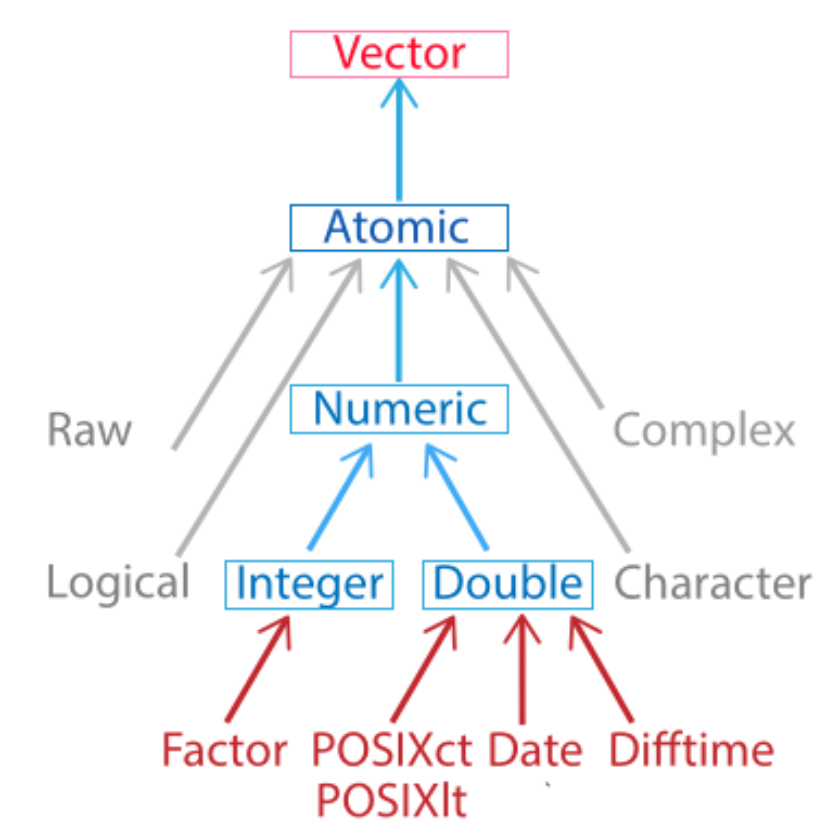

In [2]:
img <- readPNG("./images/atomic_vectors.png")     # effect of modifying a column
grid.raster(img)

#### NUMERIC VECTORS
R provides also an easy way to generate a vector of numbers. With `a:b` it creates a sequence from a to b (also in inverse if a>b), but only of step=1. If you want something eslse use `seq(start, stop, step)` for decididng th step or `seq(start, stop, length=n)` for deciding how many numbers.

With the `rep(value, each=m, times=n)` function you can create a vector built by repeating n-times the same value (written m times each time).

We can check if an object is a vector with `is.vector(x)`.

Note: VECTORS ARE NOT A CUSTOM DATATYPE OF R (LIKE LISTS), they are treated as a bunch of data of the same type (integers, ecc). They are only a kind of structure of data, typically of numbers. For this reason the *class()* command will not return 'vector' for a vector, but the data type of its elements.

INDEXING:  
The indexing is done through `[]`. Inside I can input a single index but also a vector of indexes. With negative input you can exclude elements, like `vector[-3]` will exclude the third element. Masking works as in python, so for example with `vector[x<5]` we select only the elements which are lower than 5, because the code `x<5` will generate a boolean mask (=array) of Ture and False values. 


Functions for vectors:
* `max(x)` - the maximum value in x  
* `min(x)` - the minimum value in x  
* `sum(x)` - the sum of all values in x  
* `mean(x)` - arithmetic average of the values in x  
* `median(x)` - median value in x  
* `range(x)` - a vector with inside only two values: min(x) and max(x)  
* `var(x)` - sample variance of x  
* `cor(x, y)` - correlation between x and y vectors  
* `sort(x)` - a vector with the sorted elements of x
* `rank(x)` - a vector with the ranks of the x values, cioè la posizione di ciascun valore se fosse ordinato (tipo associa le posizioni in classifica)
* `order(x)` - a vector with the permutations to sort x in asc order, i.e. the indexes of the ordered values of x
* `quantile(x)` - a vector with: minimum, lower quantile, median, upper quantile and maximum of x  
* `cumsum(x)` - a running sum of the vector elements  
* `cumprod(x)` - a running product of the vector elements  
* `cummax(x)` - a vector of non-decreasing numbers with the cumulative maxima  
* `cummin(x)` - a vector of non-decreasing numbers with the cumulative minima  
* `pmax(x, y, z)` - vector containing the maximum of x, y or z for each position  
* `pmin(x, y, z)` - vector containing the minimum of x, y or z for each position  
* `colMeans(x)` - column means of a dataframe or matrix  
* `colSums(x)` - column sums of a dataframe or matrix  
* `rowMeans(x)` - row means of a dataframe or matrix  
* `rowSums(x)` - row sums of a dataframe or matrix

In [17]:
( x <- 3:1 )

f1 <- 5
x*f1            # f1 will be broadcasted to all elements of x

f2 <- c(10, 100)
x*f2           # the shorter vector, f2, is elongated to cover the length of x

[1] 3 2 1

[1] 15 10  5

Warning message in x * f2:
“la lunghezza più lunga dell'oggetto non è un multiplo della lunghezza più corta dell'oggetto”


[1]  30 200  10

In [20]:
vec <- c(4, 7, 6, 5, 6, 7)
mean(vec)
max(vec)
vec[1]
vec[[1]]          # metodo sconsigliato, da usare con le liste
vec[-c(1,2,3)]    # this excludes the first 3 elements
rep(1,5)
rep (1:4, 1:4)    # replicate each sequence number a different number of times
vec[ c(T,F,T) ]   # NOTE: if logical vectors are too short, they are cycled to match the length of the vector
vec[ vec>6 ]


[1] 5.833333

[1] 7

[1] 4

[1] 4

[1] 5 6 7

[1] 1 1 1 1 1

[1] 1 2 2 3 3 3 4 4 4 4

[1] 4 6 5 7

[1] 7 7

In [4]:
x <- c(10, 5, 8, 20, 1)
range(x)
sort(x)
order(x)
x[order(x)]
rank(x)

[1]  1 20

[1]  1  5  8 10 20

[1] 5 2 3 1 4

[1]  1  5  8 10 20

[1] 4 2 3 5 1

We can also set names to the elments with:

In [70]:
x <- c(a=1, b=2, c=3)
x
names(x)

a b c 
1 2 3

[1] "a" "b" "c"

#### MATRIXES
With the `dim(x)` attribute of a vector, we change its dimension for example in a matrix, 'reshaping' it and its elements in a wanted dimension c(dim1, dim2...).

Note: matrices are seen as class 'matrix', differently from vectors that are not seen as vectors

In [22]:
vec <- c(1:20); vec
class(vec)
dim(vec) <- c(4,5); vec
class(vec)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

[1] "integer"

1,5,9,13,17
2,6,10,14,18
3,7,11,15,19
4,8,12,16,20


[1] "matrix" "array"

We can directly define a matrix with `matrix(elements, nrow, ncol, byrow)`. L'opzione byrow decide se riempire la matrice per righe o per colonne. We can later reshape it using `dim`. An element is accessed with `mat[row,col]`. 

We multiply matrixes with `%*%`.

We can define diagonal matrixes with `diag(elem, nrow, ncol)`. 

We can compute the determinant with `det(mat)`.

Con `solve(mat, b)` possiamo risolvere un sistema lineare Ax=b, il che significa invertire la matrice mat nel caso in cui b=0, cioè con `solve(mat)`.

In [23]:
m1 <- matrix(1:12, nrow=3); m1
class(m1)
m1[,3]      # all third column
m1[2,2]     # central element
m1[[6]]     # accediamo al sesto elemento come se i numeri fossero impilati in un'unica fila (scrittura sconsigliata)

1,4,7,10
2,5,8,11
3,6,9,12


[1] "matrix" "array"

[1] 7 8 9

[1] 5

[1] 6

#### ARRAY
An array is a multi-dimensional object where all the entries have the same class. The dimensions of an array are specified by its dim argument.

In [80]:
ar <- array(1:24, dim = c(2, 4, 3) ); ar

, , 1

     [,1] [,2] [,3] [,4]
[1,]    1    3    5    7
[2,]    2    4    6    8

, , 2

     [,1] [,2] [,3] [,4]
[1,]    9   11   13   15
[2,]   10   12   14   16

, , 3

     [,1] [,2] [,3] [,4]
[1,]   17   19   21   23
[2,]   18   20   22   24

#### CONFRONT AND INSPECT VECTORS
* `all.equal(a,b tolerance)`: compares numeric objects $a$ and $b$ testing if they are 'near' equal, including an optional tolerance
* `identical(a,b)`: compares numeric objects $a$ and $b$ testing if they are exactly equal
* `which.max(a)`: to obtain the index fo the maximum value of vector a
* `table(a)`: returns a frequency table of the values of a vector a, the with `names()` we have the category names vector
* `unique(a)`: returns a vector with the unique values of a
* `duplicated(a)`: returns a vector of logical values which are TRUE when that name has already appeared in the vector
* `union(a,b)`: returns a vector which is the union of a and b
* `intersect(a,b)`: returns a vector which is the intersection of a and b. Alternative: `a %in% b`
* `setdiff(a,b)`: returns the elements that are in a but not in b (=set difference)
* `setequal(a,b)`: returns TRUE if a and b are equal

#### FACTORS
Factor vectors are used to represent categorical data — variables that can take on a limited, fixed number of unique values, called levels. They are internally stored as integers, but displayed as text labels, so be careful when treating them like strings. So even though you entered a vector of strings, R stored it as a factor, assigning each unique value an integer level.

In base R factors are encountered very frequently: many base R functions (read.csv(), data.frame()) automatically convert character vectors to factors. To suppress this behavior use `stringsAsFactors = FALSE`.

We create them with `factor(elem, levels=..)`. We can then see them in a nice way with `table(..)`.

We can also create ordered factors where the order is important, with `ordered(elem, levels=..)`.

In [24]:
x <- factor( c("Est","West","Est"), levels = c("North","Est","South","West") ); x
grade <- ordered( c("high","low","medium","medium"), levels = c("low","medium","high") ); grade

[1] Est  West Est 
Levels: North Est South West

[1] high   low    medium medium
Levels: low < medium < high

[1] "factor"

[1] "integer"

[1] FALSE

[1] 2 4 2

 Factor w/ 4 levels "North","Est",..: 2 4 2


[1] "North" "Est"   "South" "West"

grade
   low medium   high 
     1      2      1 

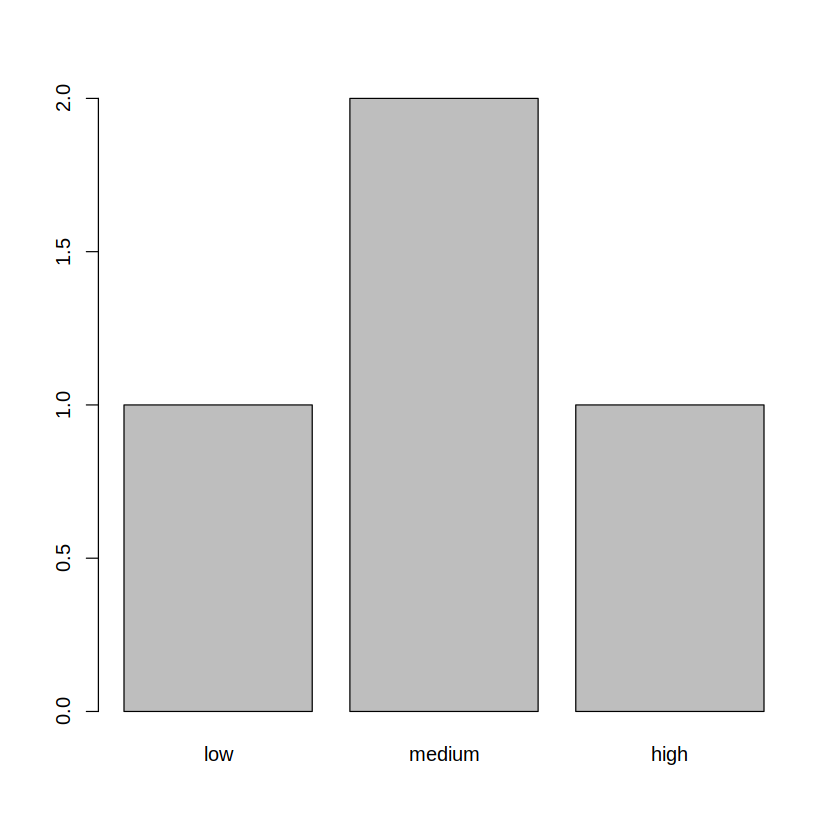

In [28]:
class(x)
typeof(x)
is.numeric(x)
as.numeric(x)
str(x)
levels(x)

table(grade)              # table of values

barplot(table(grade))     # plot

#### DATES
Date vectors and difftime vectors are built on top of double vectors. Numerically they are represented as number of days since 1970/01/01. They’re both S3 classes used for date and time handling.

The **Date** class is used to represent calendar dates, with day-level precision (i.e., no time of day, just the date). Internally, a Date is stored as the number of days since January 1, 1970.

The **difftime** class is used to represents the difference between two time or date objects — it’s the result of subtracting two Date or POSIXt objects. It stores the difference along with an option called `unit` (="secs", "mins", "hours", "days", or "weeks"). It is possible to add or subtract a number of seconds or a difftime object from a date-time object, but they cannot be added.

The **POSIXct** and **POSIXlt** classes are used for representing date-time values (i.e., dates with times), giving you much finer granularity than Date. POSIXct (ct = calendar time) it's the seconds since 1970-01-01 (numeric). Efficient storage, good for plotting and comparisons. POSIXlt (lt = local time) is list-based: is a list with elements (year, mon, etc.). More readable for extracting components. The`tzone` option is useful to set the time zone (Rome, London..).

Base time functions are:
* `Sys.time()` restituisce l'ora corrente in formato POSIXct
* `Sys.Date()`: Restituisce solo la data corrente, senza la parte dell'ora
* `Sys.sleep(n)` mette in pausa il programma per 'n' secondi
* `as.numeric( difftime(date1, date2) )`: returns the number of days between 2 dates (as a number)

The `strptime()` function in R used to convert character data into date-time objects, based on a specified format. It allows you to take a string that represents a date or time and convert it into a POSIXlt object or POSIXct object, which can then be used for time-based operations, plotting, or manipulation. The syntax is `strptime(x, format)` where x is a character vector containing the date-time strings; format is a character string that specifies the format of the input date-time (%Y for year, %m for month, etc.).

In [111]:
today <- Sys.Date(); today
typeof(today)
class(today)
yesterday <- as.Date("2025-03-14"); yesterday
delta <- today - yesterday ; delta
seq( as.POSIXlt("2019-08-01"), as.POSIXlt("2019-10-12"), "1 week" )

[1] "2025-04-10"

[1] "double"

[1] "Date"

[1] "2025-03-14"

Time difference of 27 days

 [1] "2019-08-01 CEST" "2019-08-08 CEST" "2019-08-15 CEST" "2019-08-22 CEST"
 [5] "2019-08-29 CEST" "2019-09-05 CEST" "2019-09-12 CEST" "2019-09-19 CEST"
 [9] "2019-09-26 CEST" "2019-10-03 CEST" "2019-10-10 CEST"

In [108]:
datetime <- "2021-08-30 14:45:00"
taken_datetime <- strptime(datetime, format = "%Y-%m-%d %H:%M:%S"); taken_datetime

[1] "2021-08-30 14:45:00 CEST"

In [29]:
start_time <- Sys.time()
Sys.sleep(1)
end_time <- Sys.time()
duration <- end_time - start_time
print(duration)  # Differenza in secondi

Time difference of 1.002468 secs


A useful package for dates is `lubridate`. It allows to create date from strings using functions whose name is a union of *y* (year), *m* (month), *d* (day), *h* (hour), etc.

You can also extract for example the month from a date with `month(date1)`, but also `year()`, `day()`, `wday()` (weekday with Sunday being 1), `yday` (number of the day in the year).

In [2]:
library(lubridate)
d <- ymd('2021-03-22'); d
d2 <- ymd_hms("2025-04-10 14:30:00"); d2
month(d2)


Caricamento pacchetto: ‘lubridate’


I seguenti oggetti sono mascherati da ‘package:base’:

    date, intersect, setdiff, union




[1] "2021-03-22"

[1] "2025-04-10 14:30:00 UTC"

[1] 4

---

## 05 - FLOW OF CONTROL
Let's see conditional statements and cycles.

#### IF CONDITION
La condizione deve essere un'espressione che restituisce TRUE o FALSE. Puoi usare operatori relazionali e logici come >, <, ==, !=, &, |, ecc. 'If' statements can be nested. La sintassi è la solita:

```R
if (condition1) {
  # codice se condition1 è TRUE
} else if (condition2) {
  # codice se condition2 è TRUE
} else {
  # codice se nessuna delle condizioni è TRUE
}
```

#### SWITCH
La funzione switch() in R è un'alternativa all'uso di if e else if quando si hanno molte condizioni da verificare. È utile per confrontare un'espressione con una serie di valori e restituire un risultato corrispondente a quel valore. La sintassi è:

```R
switch(expression, case1 = result1, case2 = result2, ...) 
```

In [2]:
x <- 35
y <- 45
msg <- switch( as.character( sign(x-y) ) , "1" = "x is bigger" , "0" = "x and y are equal" , "-1" = "y is bigger" )
msg

[1] "y is bigger"

#### FOR LOOPS
Sintassi:
```R
for (variabile in sequenza) {
  # Blocco di codice da eseguire
}

```

In [2]:
x <- c(1, 2, 7, 9 )
for (i in x) cat( i, " | ")

1  | 2  | 7  | 9  | 

#### WHILE LOOPS
```R
while (condizione) {
  # codice da eseguire finché la condizione è TRUE
}


#### REPEAT-IF LOOPS
It works like a classic **do-while** loop. In this way the body is executed at least once.
```R
repeat {
  # codice da eseguire
  if (condizione_di_stop) { break }
}
```


#### IF-ELSE
È una funzione vettoriale che permette di eseguire operazioni condizionali su vettori. Funziona in modo simile alla struttura if-else, ma è progettata per essere utilizzata in modo efficiente su vettori o colonne di data frame, restituendo un risultato per ogni elemento. Sintassi:
```R
ifelse(test, a, b)    # substitute a when test is TRUE, otherwise b
```

In [8]:
x <- c(0.3, 0.7, 0.1, 5, 10)
result <- ifelse(x < 1, 0, x)
print(result)

[1]  0  0  0  5 10


---

## 06 - FUNCTIONS
Functions are the most important bulding block in R. Arguments can have default values. In R, non è obbligatorio usare la funzione `return()` per restituire il valore di una funzione. Se non utilizzi return(), l'ultima espressione valutata nella funzione viene automaticamente restituita. The syntax is:
```r
nome_funzione <- function(argomento1, argomento2, ...) {
  # corpo della funzione
  return(qualcosa)  # restituisce il risultato
}
```

In [3]:
somma <- function( x=1 , y=2 ) { x+y }
somma(5,6)

[1] 11

For measuring time of computation we can use the library `microbenchmark`. È particolarmente utile quando si desidera confrontare le prestazioni di diverse funzioni o implementazioni di un algoritmo in modo rapido e preciso. Puoi fornire più di una funzione o espressione per confrontare i tempi di esecuzione. 'times' specifica quante volte ogni espressione deve essere eseguita. Sintassi:
```R
microbenchmark(codice1, codice2, ..., times = 100L) 
```

#### APPLY
The `apply()` function is used to apply a function to the rows or columns of a matrix or data frame. It operates over a specific margin (dimension) of an array (matrix or data frame). The syntax is:`apply(X, MARGIN, FUN, ...)` where:
* *X*: The matrix or data frame to which you want to apply the function.
* *MARGIN*: A number indicating which margin to apply the function to: 1: Apply function to rows. 2: Apply function to columns.
* FUN: The function you want to apply (e.g., sum(), mean(), etc.).
* ...: Additional arguments passed to the function FUN.

In [4]:
matrix_data <- matrix(1:12, nrow = 3, ncol=4); matrix_data

# Apply sum() to each row (MARGIN = 1)
apply(matrix_data, 1, sum)
# Apply sum() to each column (MARGIN = 2)
apply(matrix_data, 2, sum)


1,4,7,10
2,5,8,11
3,6,9,12


[1] 22 26 30

[1]  6 15 24 33

#### SAPPLY
The `sapply()` function is a part of the apply family of functions, which are used to apply a function to elements of a list, vector, or data frame. sapply() stands for simplified apply and attempts to simplify the result by returning an array or vector instead of a list, making it more convenient for many cases.  
The syntax is `sapply(X, FUN, ..., USE.NAMES = TRUE)` where USE.NAMES is a logical value (TRUE or FALSE). If TRUE (default), the names of the elements in X will be used as the names of the output elements.

In [4]:
x <- c(1, 4, 9, 16)
result <- sapply(x, sqrt); result

[1] 1 2 3 4

#### TAPPLY
The tapply function is useful for applying a function to subsets of data, grouped by a certain factor.  
The syntax is: `tapply(X, INDEX, FUN)`, where X is the data you want to perform a function on, INDEX is ihe factor or grouping variable, FUN is the function to apply (e.g., sum, mean, etc.).

In [6]:
df <- data.frame(
  category = c("A", "B", "A", "C", "B", "C", "A"),
  value = c(10, 20, 30, 40, 50, 60, 70)
)

# Sum of values by category
sum_by_category <- tapply(df$value, df$category, sum)
print(sum_by_category)

  A   B   C 
110  70 100 


---

## 07 - OBJECT CREATION, COPIES AND VIEWS
**All R objects are immutable**. R never changes the content of an object directly in memory. Any modification results in a new object. 

The behaviour of R is called **copy-on-modify**: when you assign one object to another, R doesn't make a full copy right away. Instead, both names point to the same memory. If you modify one of them, R creates a new copy of the object in memory — so the original isn't changed. This means that if you're modifying large data frames, matrices, or vectors many times (e.g. in a loop), that can be a performance bottleneck!

In [2]:
x <- c( 1, 2, 3)
y <- x
y[3] <- 4
str(x)   # x is not modified!
str(y)

 num [1:3] 1 2 3
 num [1:3] 1 2 4


There are a few exceptions to this rule where R can optimize performance by avoiding unnecessary copies:
* *Single Binding objects*: single binding means that there is only one reference to the object in memory (i.e., it's not shared).
* *Environments*: they are a special type of object in R that store variables as key-value pairs. Unlike typical R objects, environments are always modified in-place. This means that changes to environments do not involve copying the object; they directly modify the environment itself.

The difficulty arises because R only counts object bindings as having 0, 1, or many bindings. It does not track the exact number of references in a way that makes it easy to predict when R will apply the optimization. If an object has two bindings (i.e., it is referenced in two places), and one of the references is deleted, R does not reduce the number of bindings to one. The count still remains as many, which means R continues to treat the object as having multiple bindings, even if one reference is removed. See more [here](https://developer.r-project.org/Refcnt.html).

In [59]:
# EXAMPLE OF SINGLE BINDING:
variab <- 1  # variab has a single binding
variab <- 2  # R modifies variab directly (no copy is made)

aaa <- 10
bbb <- aaa   # x and y both reference the same object, so there are 2 bindings
rm(bbb)      # y is removed, but aaa still has the object, so the number of bindings remains "many"


# EXAMPLE OF ENVIRONMENT:
env <- new.env()
env$a <- 10  # Modifying the environment in place
env$a <- 20  # The environment is modified directly, no copy is made

---

## 08 - LISTS
Lists are important objects in R where each element can be of different type. But from the technical point of view each element of a list is of the same type: it is a reference to another R object. 

We create list with the command `list(...)`.

To change a list into a vector use `unlist(..)` (when it can be done).

In [5]:
prova <- list( 1:3, "word", rep( c(T,F,T), 1:3) ) ; prova

[[1]]
[1] 1 2 3

[[2]]
[1] "word"

[[3]]
[1]  TRUE FALSE FALSE  TRUE  TRUE  TRUE

Indexing on lists uses **double square brackets** `[[...]]` to extract a single element directly. In contrast, single square brackets `[...]` always return a sublist containing the specified elements (i.e., still a list).

Another way to access elements is using the `$` operator to select a component by name. For instance, `x$` is equivalent to `x[["col_name"]]`, and both return the actual object (e.g., a vector), not a list containing that object — unlike `x["col_name"]`, which returns a list with one named element.

In [24]:
l <- list(a = 15:19, b = c("x", "y"))

l[1]            # returns a list with inside the first element
l[1:2]          # returns a list with inside the first 2 elements
class( l[1] )   # "list"
# NOTE: for lists you can't use indexing with a comma like l[1,2]!!!! Only with matrices or dataframes

l[[1]]          # ---> returns the first element, here given by the sequence of integers 15:19
l[[1]][[2]]     # ---> it enters the 1st element (which is a vector) and returns its 2nd element (a number)
l[[1]][2]       # ---> it enters the 1st element (which is a vector) and returns its 2nd element (a number) --- this version is better because we use single brackets to access vectors
class( l[[1]] ) # "integer"

$a
[1] 15 16 17 18 19

$a
[1] 15 16 17 18 19

$b
[1] "x" "y"

[1] "list"

[1] 15 16 17 18 19

[1] 16

[1] 16

[1] "integer"

We can give a name to lists' elements and used them to access:

In [37]:
l <- list(a = 15:19, b = c("x", "y"))
l[["b"]]    # "x" "y"
l$b         # "x" "y"

[1] "x" "y"

[1] "x" "y"

---

## 09 - DATA.FRAMES
In R, a data frame is the main way to store tabular data — like a spreadsheet or a SQL table. It looks like a matrix: it has 2 dimensions (rows and columns) and you can access elements using [row, column]. But under the hood, it's actually built differently from a matrix. Internally **a Data Frame is a list of equal-length vectors**, where each vector is a column. R adds metadata (like names) and sets its class to "data.frame" to make it behave like a table. We create it with the command `data.frame(..)`.

EFFECT OF COPY-ON-MODIFY:  
If we modify a column, only the reference to the new column will be updated. But if any row is modified, every column is modified because every column must be copied.

#### INDEXING
Even though data frames are technically lists of equal-length vectors, they support matrix-like 2D indexing in addition to list-style indexing.
* `df[[i]]` or `df[["col_name"]]` or `df$col_name`: returns a vector (a column), like in list indexing.
* `df[i]` or `df["col_name"]`: returns a data frame (so a list) with one column (watch out: nested structure).
* `df[2, 3]`: value in row 2, column 3 (like in matrices)
* `df[2, ]`: entire second row as a data frame!!
* `df[, "col_name"]` or `df[, 2]`: returns column as a vector!!
    * instead `df[, 2, drop=FALSE]`: returns column as a data frame!! Because with `drop=False` we tell R to keep the structure

The explanation for the last three is that while *df[, "col_name"]* extracts a column, which is a vector, so R returns the vector directly; instead with *df[2, ]* it extracts a row, which isn't a vector in the data frame, it's a combination of different columns (which might be of different types), so R returns it as a data frame with one row, preserving structure.

Summary:
* Use `[[ ]]` or `$` to extract a column as a vector
* Use `[ , ]` for 2D subsetting
* Use `[ ]` for column(s) as data frame(s)

#### EXAMPLES
Some examples of indexing for data frames:
* `data[n,]`: select all of the columns from row n of the data frame.
* `data[-n,]`: drop the whole of row n from the data frame.
* `data[1:n,]`: select all of the columns from rows 1 to n of the data frame.
* `data[c(i,j,k),]`: select all of the columns from rows i, j, and k of the data frame.
* `data[x > y,]`: use a logical test (x > y) to select all columns from certain rows.
* `data[,m]`: select all of the rows from column m of the data frame (returns a vector!)
* `data[,c(1:m,i,j,k)]`: add duplicate copies of columns i, j, and k to the data frame.
* `data[x > y,a != b]`: extract certain rows (x > y) and certain columns (a != b).

In [41]:
df <- data.frame(  
    nomi = c("Aldo", "Bob", "Carlo", "Dario", "Eia", "Francesco", "Giulio"),    
    age = c(11, 12, 13, 14, 15, 16, 17)    
)
typeof(df)   # techincally it's a list!
attributes(df)
str(df)
df[sample(1:5,2),]  # select 2 rows at random in the first 5
df[ , sapply( df, is.numeric) ] # select the numeric columns

[1] "list"

$names
[1] "nomi" "age" 

$class
[1] "data.frame"

$row.names
[1] 1 2 3 4 5 6 7

'data.frame':	7 obs. of  2 variables:
 $ nomi: chr  "Aldo" "Bob" "Carlo" "Dario" ...
 $ age : num  11 12 13 14 15 16 17


,nomi,age
,<chr>,<dbl>
4,Dario,14
2,Bob,12


[1] 11 12 13 14 15 16 17

In [39]:
# Create a sample data frame
df <- data.frame(
  a = 1:3,
  b = c("x", "y", "z"),
  c = c(TRUE, FALSE, TRUE)
)

# Extracting columns
df[1]          # data frame with column 'a' (returns a dataframe)
df[[1]]        # vector: 1 2 3 (returns the vector of the first column)
df[["a"]]      # vector: 1 2 3 (returns the vector of the 'a' column)
df$a           # vector: 1 2 3 (returns the vector of the 'a' column)
# multiple columns
df[c("a", "c")]    # data frame with columns 'a' and 'c' (returns a dataframe with selected columns)
df[1:2]            # data frame with columns 'a' and 'b' (returns a dataframe with the first two columns)

# Extracting rows
df[2, ]            # data frame with 1 row (row 2) (returns a dataframe with the second row)
df[1:2, ]          # data frame with rows 1 and 2 (returns a dataframe with rows 1 and 2)

# Extracting elements
df[2, 1]           # single value (2nd row, 1st column): 2 (returns a single value: 2)
df[[1]][2]         # same value: 2 (returns 2 from the vector in the first column)


a
<int>
1
2
3


[1] 1 2 3

[1] 1 2 3

[1] 1 2 3

a,c
<int>,<lgl>
1,TRUE
2,FALSE
3,TRUE


a,b
<int>,<chr>
1,x
2,y
3,z


,a,b,c
,<int>,<chr>,<lgl>
2,2,y,FALSE


,a,b,c
,<int>,<chr>,<lgl>
1,1,x,TRUE
2,2,y,FALSE


[1] 2

[1] 2

In [31]:
nomi  <- c("Alice", "Bob", "Charlie")
età   <- c(25, 30, 28)
città <- c("Roma", "Milano", "Firenze")

df <- data.frame( Nome = nomi,    Età = età,   Città = città    )
print(df)

     Nome Età   Città
1   Alice  25    Roma
2     Bob  30  Milano
3 Charlie  28 Firenze


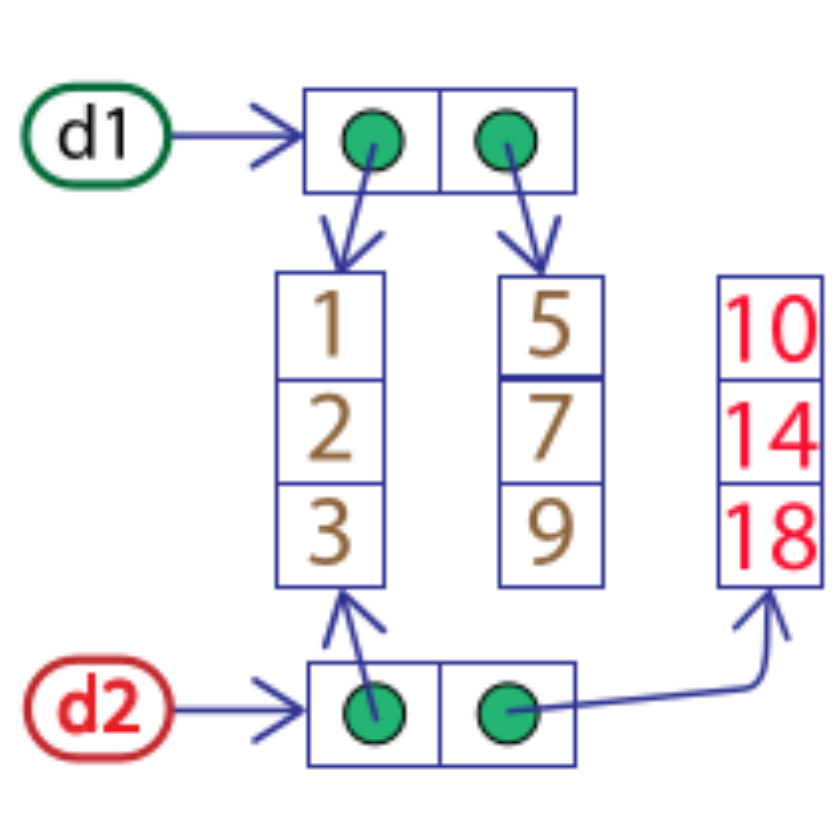

In [16]:
img <- readPNG("./images/data.frame.png"); grid.raster(img)

#### USEFUL COMMANDS:
* `rbind()`: will combine the rows of a data.frame/matrix by matching column names (i.e., the columns must have the same names and types because I'm adding more rows)
* `cbind()`: will combine columns of a data.frame/matrix (i.e., the columns must have the same length because I'm adding more columns).

In [22]:
v1 <- c(1, 2, 3)
v2 <- c(4, 5, 6)

rbind(v1, v2)    # Output: a matrix with 2 rows and 3 columns
cbind(v1, v2)    # Output: a matrix with 3 rows and 2 columns

v1,1,2,3
v2,4,5,6


v1,v2
1,4
2,5
3,6


---

## 10 - RANDOM
With the `sample` function , data can be selected at random. The syntax is:
`sample(x, size, replace = FALSE, prob = NULL)`.

Parameters are:
* x: The vector or object from which you want to sample.
* size: The number of items to sample.
* replace: indicates whether sampling is done with replacement (TRUE) or without replacement (FALSE). Default is FALSE.
* prob: A vector of probabilities that specifies the probability of selecting each element in x.

## 11 - DPLYR
The `dplyr` package is one of the most essential and powerful packages in R for data manipulation. It's built to make data transformation tasks (like filtering, summarizing, and sorting) simple and readable using a “grammar of data manipulation. It works best with data.frames and tibbles. We use this library with `library(dplyr)`.

It also introduce (from the magrittr library) the PIPE Operator `%>%`: you can chain operations together like a recipe! It processes a data-object with a sequence of operations by passing the result of one step as input for the next step. Starting from R version 4.1 it is part of the language as `|>`.

The main commands share similarities with SQL language. Tipycally the first argument is the data.frame, and then the options (like column names etc):
* `filter()`:	Select rows based on conditions
* `select()`:	Select columns
* `mutate()`:	Add or modify columns
* `transmute()`: Add columns and keep only them
* `summarize()`:	Collapse multiple values into one (e.g. mean over a column). Syntax:`summarize(data, new_column = function(column))`
* `arrange()`:	Sort rows (by the values of one or more columns)
* `group_by()`:	Group data for grouped operations
* `rename()`:	Rename columns
* `distinct()`:	Remove duplicate rows
* `slice()`:	Extract specific rows by index
* `join()`:

Some useful functions are:
* `n()`: it returns the total number of observations (rows) for each group when used with group_by(). If there’s no grouping, it returns the number of rows in the entire data frame.
* `n_distinct()` is used to count the number of unique (distinct) values in a column. It returns the number of distinct values within a group (or in the entire dataset if there is no grouping).
```R
# Example that reads like: "Take data, keep rows where score > 90, keep only name and score, and sort by score descending."
data %>%
  filter(score > 90) %>%
  select(name, score) %>%
  arrange(desc(score))
```


In [9]:
library(dplyr)

# Example dataset
df <- data.frame(
  category = c('A', 'B', 'A', 'B', 'A'),
  value = c(10, 20, 30, 40, 50)
)

# Using n() to count the number of rows in each group
df_summary <- df %>%
  group_by(category) %>%
  summarize(
    count = n()
  )

print(df_summary)


# A tibble: 2 × 2
  category count
  <chr>    <int>
1 A            3
2 B            2


## 12 - DATA.TABLE
The package `data.table` is an enhanced version of R’s data.frame, designed for fast and memory-efficient data manipulation, especially useful with large datasets. It can modify data without copying it (**less memory usage**). You can chain multiple operations using [].

A data.table is created using the `fread()` function for reading data on disk, or provided on the fly with the `data.table()` function.

Existing objects can be converted to data.table using the `setDT()` and the `as.data.table()` functions.

Basic Syntax: `DT[i, j, by]`, where *i* selects the row, *j* choose what to do (e.g., calculations, column selections),and *by* is th group by method.

In [15]:
library(data.table)

DT <- data.table(name = c("Alice", "Bob", "Alice"),    # Create a data.table
                 score = c(10, 20, 15)) 

DT[name == "Alice" & score==20]    # Filter rows using intersection
DT[, mean(score), by = name]       # Calculate mean score by name
DT[, doubled := score * 2]         # Add a new column

name,score
<chr>,<dbl>


name,V1
<chr>,<dbl>
Alice,12.5
Bob,20.0


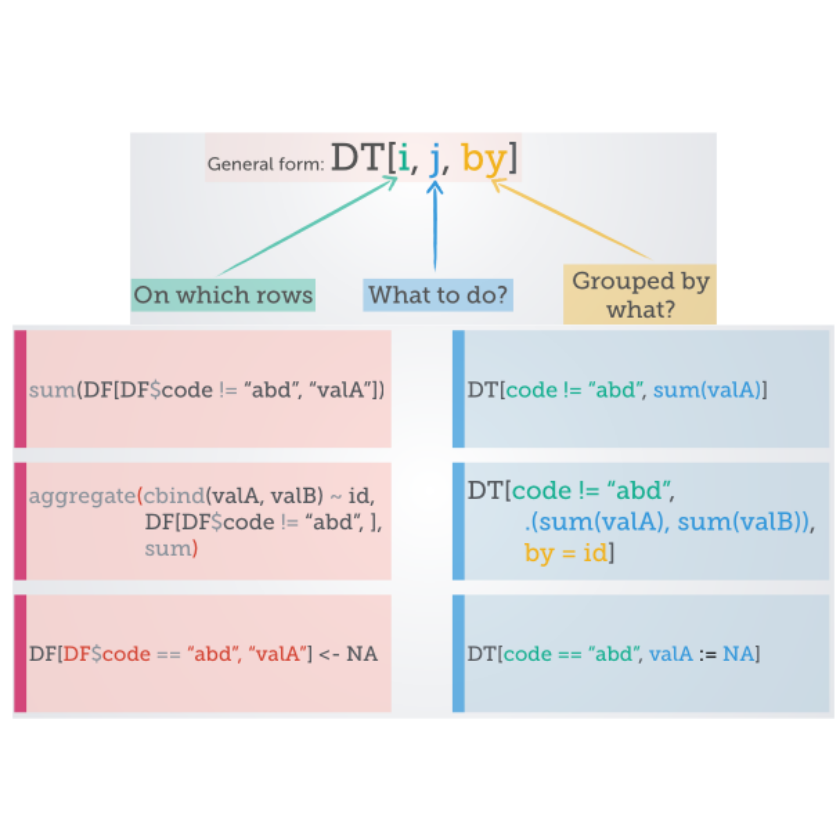

In [17]:
img <- readPNG("./images/data.table.png"); grid.raster(img)

---

## 13 - BASE GRAPHICS
The main libraries are the base one, `grid`, `lattice` and `ggplot2`.

In general to change the dimension of a plot, you can use `options(repr.plot.width = A, repr.plot.height = B)`, with $A$, $B$ being the wanted dimensions. The *repr* prefix stands for "representation," indicating that this option controls how the output (in this case, plots) is rendered in the notebook interface. NOTE: this line of code will influence ALL the jupyter notebook.

The `axis()` function is used to manually add axes to a plot or to customize them in detail (e.g., tick positions, labels, etc.).  
The syntax is: `axis(side, at = NULL, labels = TRUE, ...)`. The parameters are: 
* *side*: which side of the plot to draw the axis on: 1 = bottom, 2 = left, 3 = top, 4 = right	
* *at*: positions (values) where tick marks should be placed
* *col*, *cex.axis*, *tck*, *lwd*, *line*, ...: styling options


#### BOXPLOT
A boxplot (also known as a box-and-whisker plot) provides a graphical representation of the errors (the wiskers), first quartile (Q1), median and third quartile (Q3) of a dataset. It is particularly useful for identifying outliers, understanding the spread and central tendency of data, and comparing distributions across different groups. The central Box represents the interquartile range (IQR), which includes the middle 50% of the data.

Main syntax: `boxplot(..., data, main, xlab, ylab)` where *data* are the dtata to be represented, *main* is the title of the plot; *xlab*, *ylab* are the labels for the x and y axes, '*...*' are for the personalization.




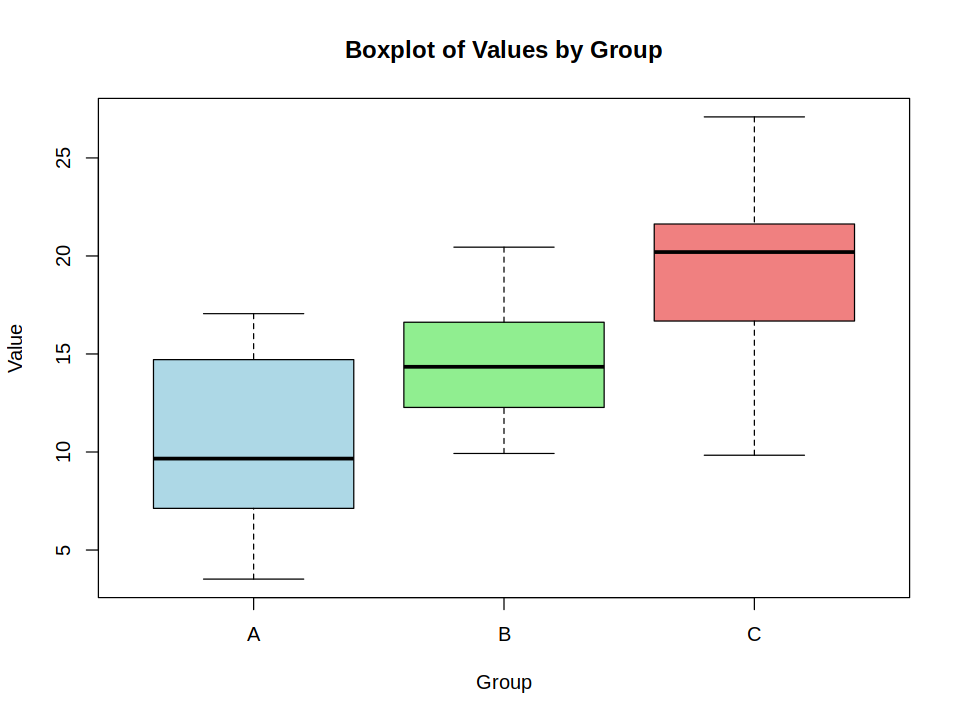

In [49]:
options(repr.plot.width = 8, repr.plot.height = 6)

data <- data.frame(
  group = rep(c("A", "B", "C"), each = 20),  # Three groups (A, B, C)
  value = c(rnorm(20, mean = 10, sd = 5),   # Group A: Normal distribution, mean=10, sd=5
            rnorm(20, mean = 15, sd = 3),   # Group B: Normal distribution, mean=15, sd=3
            rnorm(20, mean = 20, sd = 4))   # Group C: Normal distribution, mean=20, sd=4
)

boxplot(value ~ group, data = data,
        main = "Boxplot of Values by Group",  # Title of the plot
        xlab = "Group",                      # Label for the x-axis
        ylab = "Value",                      # Label for the y-axis
        col = c("lightblue", "lightgreen", "lightcoral")  # Colors for each group
        ) 

#### HISTOGRAM
The `hist()` function in R is used to create histograms. It divides the range of data into bins (intervals) and plots the frequency (or count) of data points in each bin.

The syntax is`hist(x, main, xlab, ylab, xlim, ylim, breaks, col, border, add=FALSE, probability=FALSE ...)`.

The parameters are:
- *x*: a vector with numeric values used in histogram
- *main*: indicates title of the chart
- *col*: is used to set color of the bars
- *border*: is used to set border color of each bar
- *xlab*: is used to give description of x-axis
- *xlim*: specifies the range of values on the x-axis
- *breaks*: how the data should be split into bins. It can be a number (for the number of bins), a method (such as "Sturges" or "FD"), or a vector of breakpoints. The default is "Sturges".
- *frame = FALSE*: removes the box around the plot
- *add*: set it to TRUE if you want to add more histograms one over the other. Then the option *freq = TRUE* will ensure that, in case of non equal number of observations, the heights of an interval remain the same.
- *probability*: se it to TRUE to have normalization

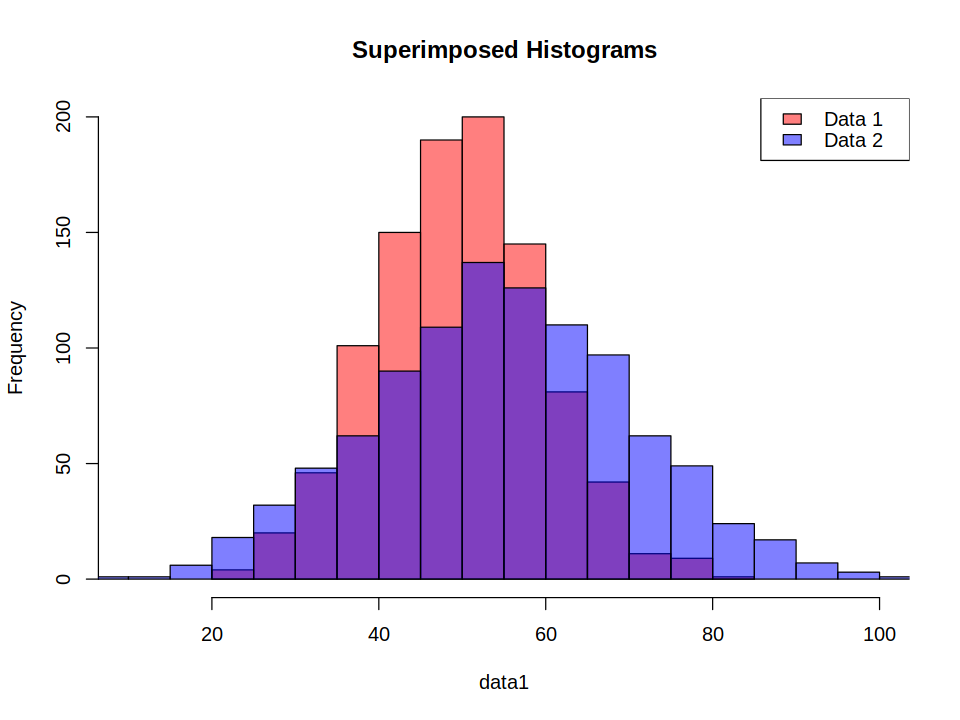

In [50]:
options(repr.plot.width = 8, repr.plot.height = 6)
# let's create data:
data1 <- rnorm(1000, mean = 50, sd = 10)  # Normal distribution
data2 <- rnorm(1000, mean = 55, sd = 15)  # Normal distribution

hist(data1, 
     col = rgb(1, 0, 0, 0.5), # Red with transparency
     xlim = c(10, 100),       # Same x limits for all histograms
     #breaks = 30,            # 30 bins
     main = "Superimposed Histograms" # Title
     #probability = TRUE,     # Normalize to get density
     )        # Border color for bars

# Add second histogram
hist(data2, 
     col = rgb(0, 0, 1, 0.5), # Blue with transparency
     breaks = 30,             # Same number of bins
     add = TRUE)              # Add to the existing plot

# Add a legend to the plot
legend("topright", 
       legend = c("Data 1", "Data 2"), 
       fill = c( rgb(1, 0, 0, 0.5), rgb(0, 0, 1, 0.5) ),
       border = "black")


#### MULTIPLE PLOTS and some personalisation
The `par()` (=plotting area) function is used to set graphical parameters, and it can be very useful for arranging multiple plots in the same window.

```R
# example:
par(mfrow = c(2, 2), pin = c(5,4))  # 2 rows and 2 columns of plots (filled by rows) in figure of dim 5,4
```
Some parameters:
* `mfrow` (=multi-figure row) or `mfcol`: to create multiple plots in a single plot window. It specifies how the plots are arranged (e.g., in rows or columns).
* `pin`: specify the physical dimensions (in inches) of the plotting region, which can affect the aspect ratio of the plot.
* `mar`: margins (c(bottom, left, top, right)) in lines
* `cex`: general scaling factor for text. Ex: *par(cex=1.5)*. Some other options: *cex.lab* (axis label size), *cex.axis* (axis tick size), *cex.main* (main title size
* `font`: Font style (1=plain, 2=bold, 3=italic, 4=bold-italic)
* `col`: Default color for text and points
* `pch`: Plotting symbol type



The `layout()` function offers more flexibility than par(mfrow) when it comes to arranging multiple plots in a grid. While mfrow and mfcol are used to create a uniform grid layout, layout() allows you to define custom arrangements for rows and columns. The syntax is `layout(mat)`, where *mat* is a matrix that specifies the layout structure. The matrix dimensions defines the number of rows and columns for the layout. Each element in the matrix represents a plot. A value of 0 says that such parts should not be
used for plots. Repeated element values means that cells correspond to the same plot.

```R
# example:
M <- matrix( c(1,1,2,3,0,4) , nrow=2, ncol=3 )
layout( M )
```


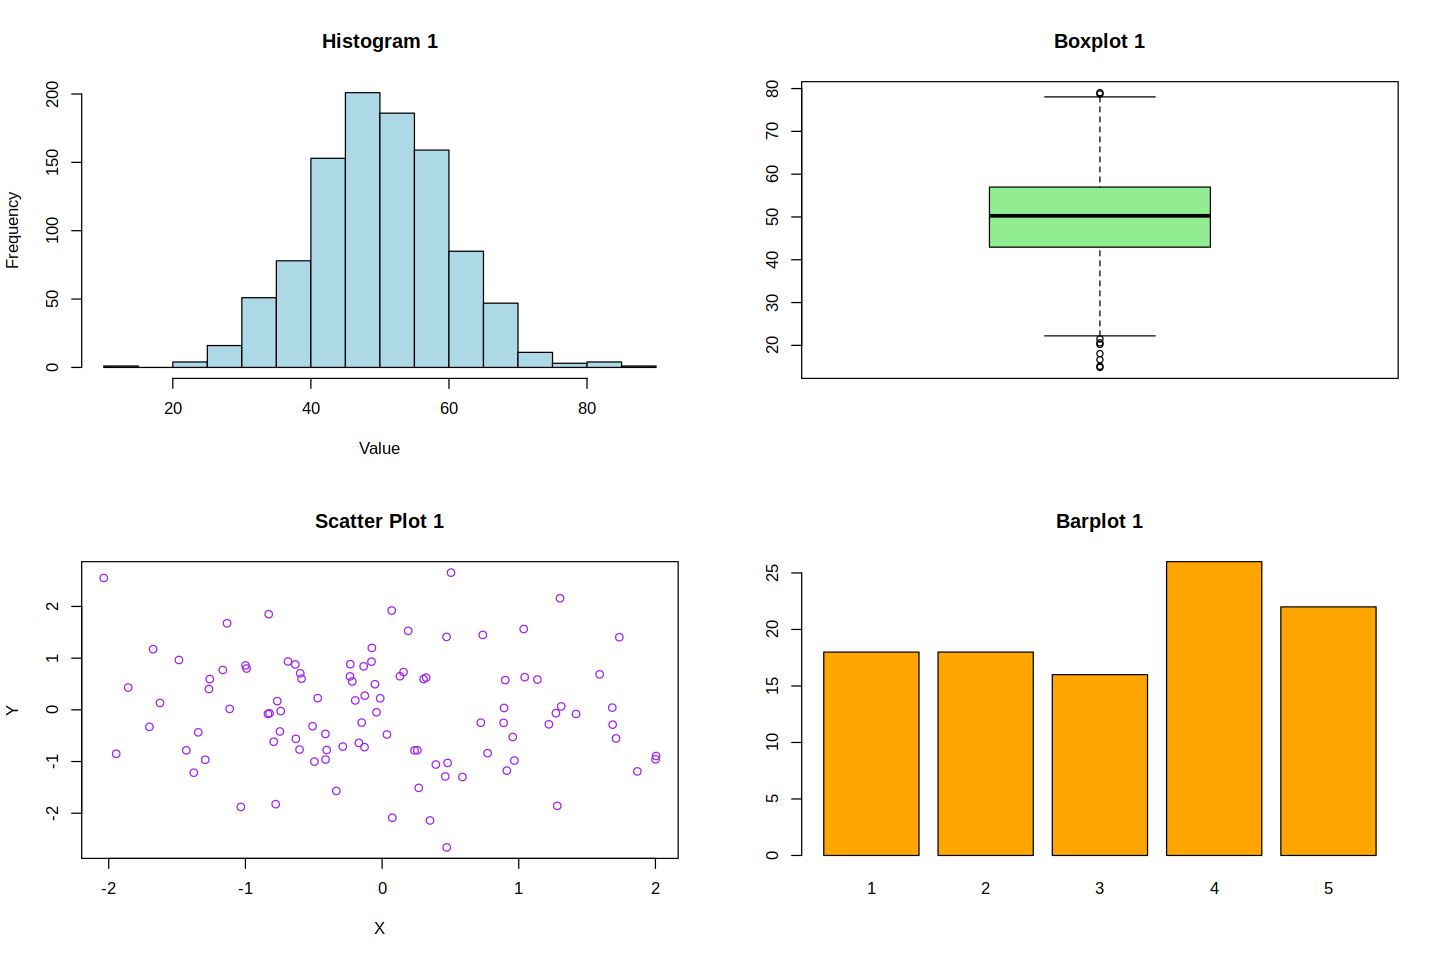

In [52]:
options(repr.plot.width = 12, repr.plot.height = 8)
# Set up the plotting area to have 2 rows and 2 columns
par(mfrow = c(2, 2))  # 2 rows and 2 columns

hist(rnorm(1000, mean = 50, sd = 10), main = "Histogram 1", xlab = "Value", col = "lightblue")

boxplot(rnorm(1000, mean = 50, sd = 10), main = "Boxplot 1", col = "lightgreen")

plot(rnorm(100), rnorm(100), main = "Scatter Plot 1", xlab = "X", ylab = "Y", col = "purple")

barplot(table(sample(1:5, 100, replace = TRUE)), main = "Barplot 1", col = "orange")

# Reset the plotting layout to default (1 plot per window)
par(mfrow = c(1, 1))

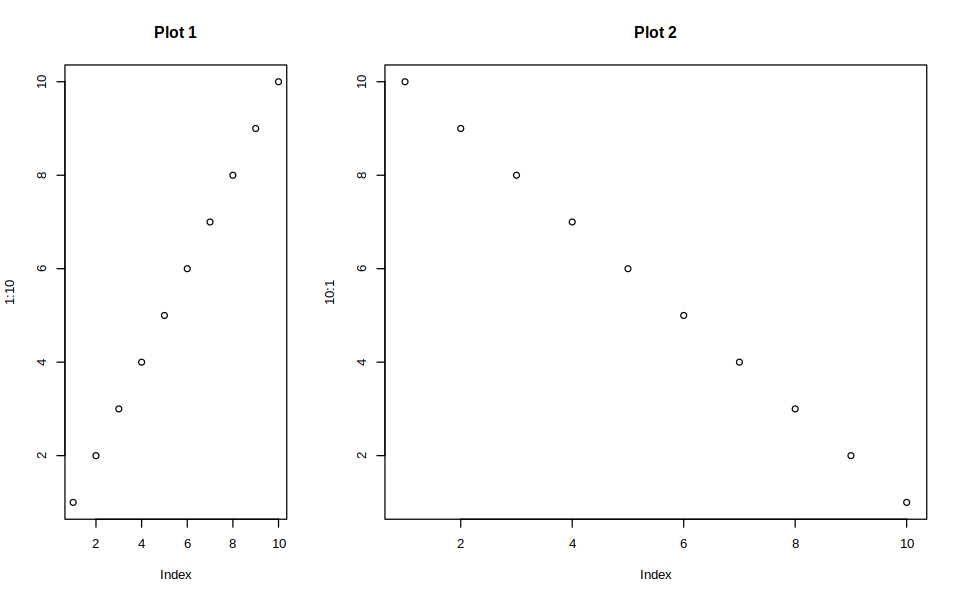

In [54]:
options(repr.plot.width = 8, repr.plot.height = 5)
layout( matrix( c(1, 2, 2), nrow = 1) )

# Plot 1 spans two columns
plot(1:10, main = "Plot 1")
# Plot 2 occupies the remaining column
plot(10:1, main = "Plot 2")

#### SCATTER PLOT
The `plot()` function allows to produce a scatter plot of one variable versus the other. 

The basic syntax is: `plot(x, y)` where *x* and *y* are the two vectors of data. 
Some possible personalizations are:
* type: type of plot: "p" display points (default), "n" creates an empty plot (for drawing lines etc)
* main: Title of the plot.
* xlab and ylab: Labels for the x and y axes.
* col: Change the color of the points. You can also add something more complex like colors for a semiplane etc
* pch (= plotting character): Change the point type (e.g., circles, triangles) through: Numbers 0–25; a single character in quotes (e.g. 'x', 'o')
* cex (= character expansion): Adjust the size of the points.
* asp = k: allows to keep the y /x aspect ratio to a fixed value k

ADDING REGRESSION:
With the `abline()` fucntion you can add a line to the plot. Then with the `lm(y~x)` (=linear model) you can add a simple regression of the variables $y$ and $x$.
```R
# example:
abline( lm(y ~ x), col = "red") 
```

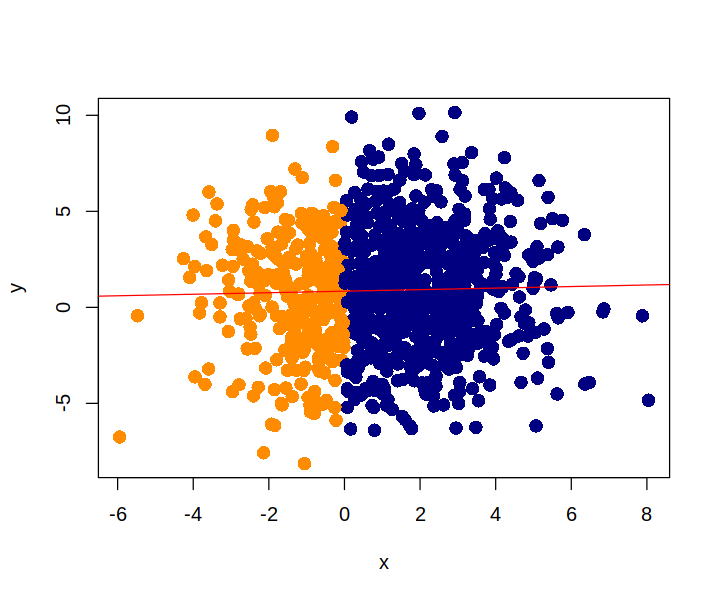

In [75]:
options(repr.plot.width = 6, repr.plot.height = 5)

x <- rnorm( 1000, 1, 2)
y <- rnorm( 1000, 1, 3)

plot(x, y, pch = 16, cex = 1.5, col = ifelse ( x > 0 , " navy " , " darkorange " ) )
abline(lm(y ~ x), col = "red")  # Adds a linear regression line in red

#### BARPLOT
The `barplot()` function is used to create bar plots, which are a great way to visualize categorical data. The bars can be vertical or horizontal, and you can customize the appearance with various parameters. Memo: A BARPLOT IS NOT AN HISTOGRAM!  
Syntax: `barplot(height, beside = FALSE)`  
Parameters:
* *height*: A vector or matrix of values that will form the heights of the bars.
* *beside*: If TRUE, it will create a bar plot where bars for each category are placed beside each other (useful for comparing groups).
* *col*: Colors for the bars.
* *main*: Title for the plot.
* *xlab* and *ylab*: Labels for the x and y axes.
* *names.arg*: vector with the names of the categories


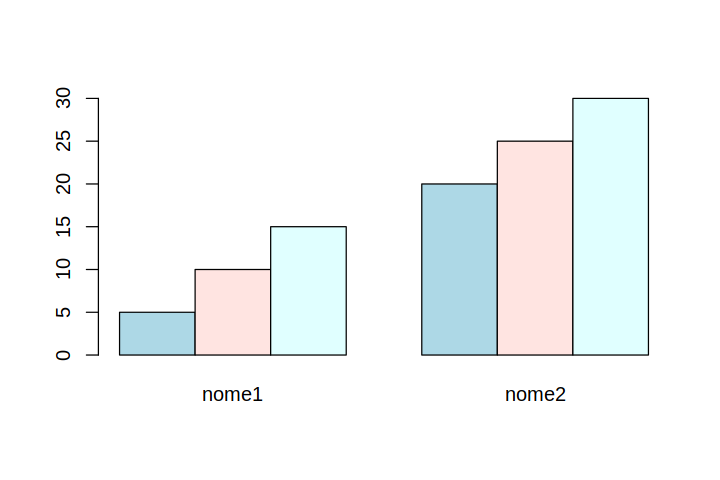

In [1]:
options(repr.plot.width = 6, repr.plot.height = 4)

# Example with multiple categories (a matrix)
data_matrix <- matrix(c(5, 10, 15, 20, 25, 30), ncol = 2, nrow=3)
names <- c('nome1', 'nome2')

# Bar plot with side-by-side bars for each category
barplot(data_matrix, beside = TRUE, names.arg = names,
        col = c("lightblue","mistyrose","lightcyan")
        )

#### LINES
The `lines()` function in R is used to add lines to an existing plot. It doesn’t create a new plot (unlike plot()), but overlays lines on top of an existing one — perfect for connecting points or plotting additional data.

Syntax: `lines(x, y, type = "l", col = "blue", lwd = 2, lty = 1)`

Parameters:
* *x, y*: numeric vectors of coordinates.
* *type*: kind of plot line ("l" for lines, "o" for overplotted points and lines, 's' for stepped line etc.).
* *col*: color of the line.
* *lwd*: line width.
* *lty*: line type (1 = solid, 2 = dashed, etc.).

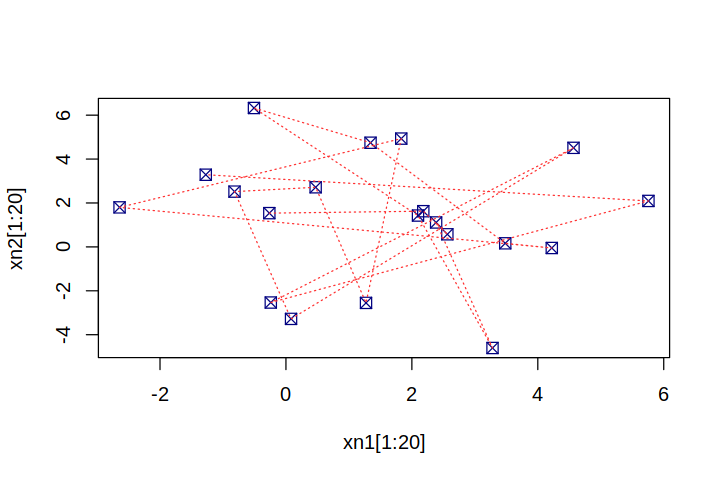

In [77]:
options(repr.plot.width = 6, repr.plot.height = 4)
xn1 <- rnorm( 1000, 1, 2)
xn2 <- rnorm( 1000, 1, 3)
plot(xn1[1:20], xn2[1:20], pch=7, cex=1.25, col="navy")
lines(xn1[1:20], xn2[1:20], col="firebrick1", lty=3)

#### CURVE, ABLINE, POLYGON
The `curve()` function is used to plot mathematical expressions or functions easily, without explicitly computing a vector of values.  
Syntax: `curve(expr, from, to, n = 100, add = FALSE, col = "black", lwd = 1, ...)`  
Parameters:
* *expr*: the expression or function to plot, like sin(x) or function(x) x^2.
* *from, to*: the interval on x-axis over which to plot.
* *n*: number of points to evaluate.
* *add*: if TRUE, adds to existing plot (like lines()).
* *col, lwd*: color and line width.

The `abline()` function is used to add straight lines (horizontal, vertical, or regression lines) to an existing plot, , given the intercept and slope.
```R
# examples:
abline(lm(y ~ x), col = "red", lwd = 2)   # regression line
abline(a = 2, b = 0.5, col = "purple")    # line of slope a, intercept b
abline(h = 5, col = "blue")               # horizontal line
abline(v = 3, col = "green")              # vertical line
```

The `polygon()` function is used to draw filled polygons on a plot. It’s useful for highlighting areas, creating custom shapes, or shading under curves.  
Syntax: `polygon(x, y, col = "lightblue", border = "blue", lty = 1, lwd = 1)`, with x, y vectors of coordinates.

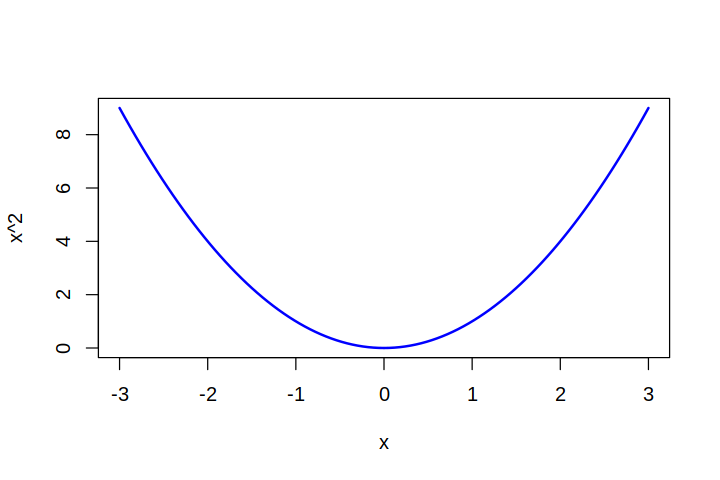

In [78]:
options(repr.plot.width = 6, repr.plot.height = 4)
curve(x^2, from = -3, to = 3, col = "blue", lwd = 2)

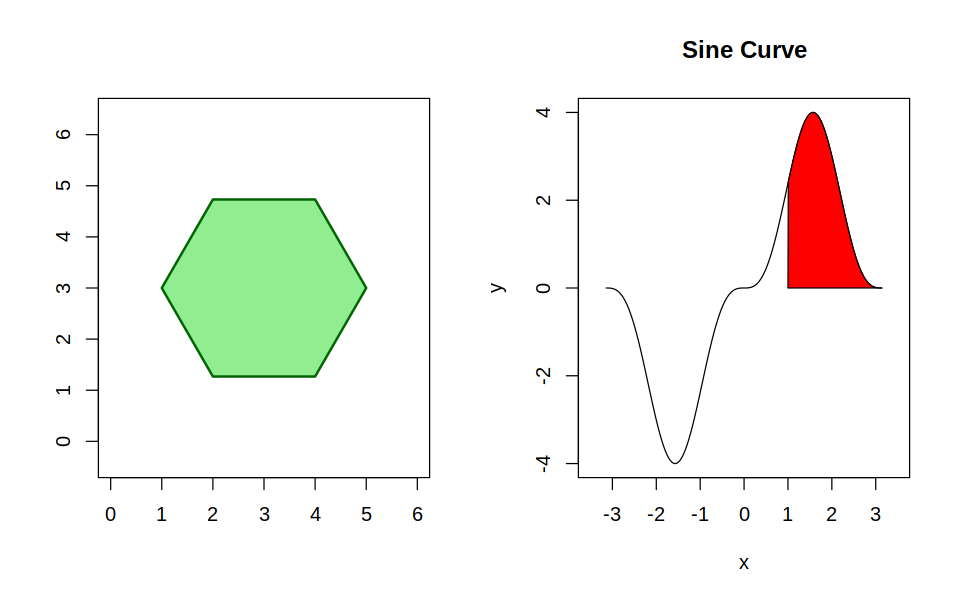

In [92]:
options(repr.plot.width = 8, repr.plot.height = 5)
par(mfrow = c(1, 2))

# First plot: Hexagon
theta <- seq(0, 2 * pi, length.out = 7)  # 6 points + 1 to close the shape
x <- 3 + 2 * cos(theta)
y <- 3 + 2 * sin(theta)
plot(0, 0, type = "n", xlim = c(0, 6), ylim = c(0, 6), asp = 1, xlab = "", ylab = "")
polygon(x, y, col = "lightgreen", border = "darkgreen", lwd = 2)

# Second plot: Sine curve with a filled area (POLYGON)
x <- seq(-pi, pi, 0.01)
y <- 4 * sin(x)^3
plot(x, y, type = "l", asp = 1, xlab = "x", ylab = "y", main = "Sine Curve")
polygon(c(1, x[x >= 1]), c(0, y[x > 1]), col = "red", angle = 10)

#### HEATMAP
The `heatmap()` function visualizes a numeric matrix as a color-coded image. It takes a matrix as input. It displays rows vs columns as a grid. Each cell's color represents the numeric value in the matrix. By default, it clusters rows and columns using hierarchical clustering.

The syntax is:   
`heatmap(mat, Rowv = TRUE, Colv = TRUE, scale = "row", col = heat.colors(256), margins = c(5, 5),main = NULL, xlab = NULL, ylab = NULL)`

Important Arguments:
* *x*: a numeric matrix.
* *Rowv*: reorders rows: TRUE, FALSE, or a dendrogram. Use NA to disable.
* *Colv*: same as above, but for columns.
* *scale*: "row", "column", or "none". Standardizes values.
* *col*: color palette. Try heat.colors(), topo.colors(), viridis::viridis(), etc.
* *margins*: space around the plot for labels (default c(5, 5)).
* *main, xlab, ylab*: titles and labels.

WATCH OUT: By default, it clusters rows and columns using hierarchical clustering. This is because la funzione heatmap() in R non si limita a disegnare i valori del tuo matrix con colori, ma fa anche clustering automatico per ordinare righe e colonne in modo che pattern simili vengano visualizzati vicini tra loro. Serve a far emergere pattern: se alcune righe o colonne hanno valori simili, appaiono vicine. È utile, ad esempio, in bioinformatica per visualizzare geni espressi in modo simile. Quindi devi disattivare il clustering così:

`heatmap(mat, Rowv = NA, Colv = NA, scale = "none")`

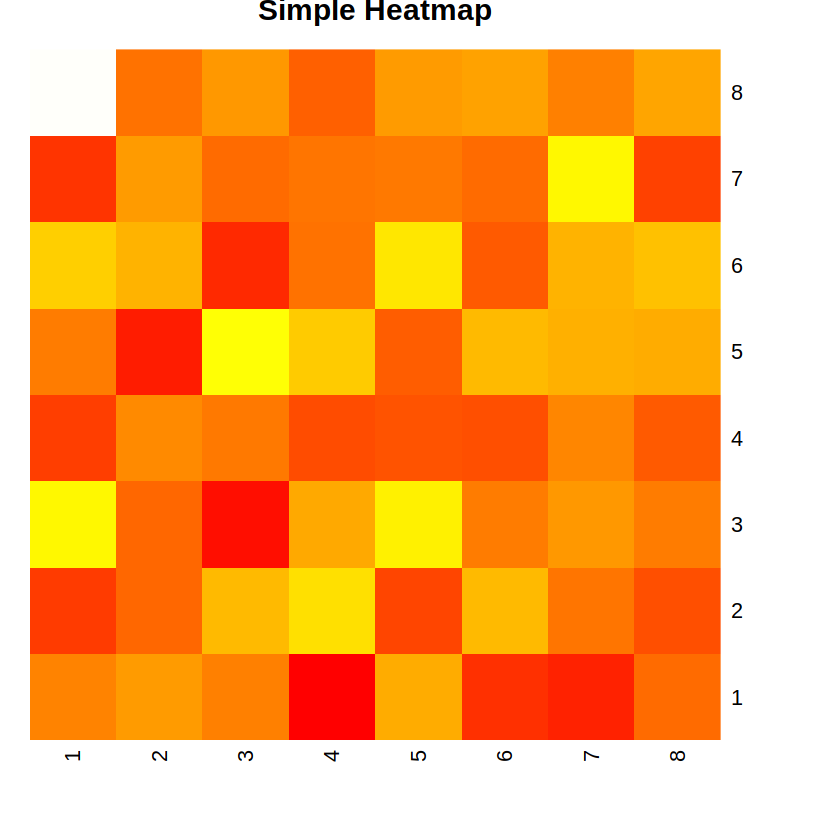

In [2]:
# Create a sample matrix
mat <- matrix(rnorm(64, mean=10, sd=3), nrow=8)

# Basic heatmap
heatmap(mat, 
        Rowv = NA, 
        Colv = NA, 
        scale = "none", 
        col = heat.colors(100), 
        main = "Simple Heatmap")


---

## 14 - GGPLOT2

#### GRAMMAR OF GRAPHICS
The Grammar of Graphics is a framework for data visualization and ggplot2 is based on it. It provides a structured way to think about building visualizations by describing them as a combination of layers that represent different components of the plot. The basic idea is that every plot can be broken down into a series of building blocks:
* **Data**: a rectangular data frame structure where rows are observations and columns are variables.
* **Mapping**: a set of instructions on how parts of the data are mapped onto aesthetic attributes of geometric objects. A mapping can be made by using the `aes()` function
* **Layers**: they take the mapped data and display it in something humans can understand as a representation of the data. A layer can be constructed using the **geom_*()** and **stat_*()** functions. Every layer consists of three important parts:
    * The *geometry* that determines how data are displayed, such as points, lines, or rectangles.
    * The *statistical transformation* that may compute new variables from the data and affect what of the data is displayed.
    * The *position adjustment* that primarily determines where a piece of data is being displayed
* **Scales**: are responsible for updating the limits of a plot, setting the breaks, formatting the labels, and possibly applying a transformation.
* **Facets**: can be used to separate small multiples, or different subsets of the data.
* **Coordinates**:
* **Theme**: you can use the theme for customizations ranging from changing the location of the legends to setting the background color of the plot. To tweak the look of the plot, one can use many of the built-in **theme_*()** functions and/or detail specific aspects with the **theme()** function. The **element_*()** functions control the graphical attributes of theme components.

Out of these components, ggplot2 needs at least the following three to produce a chart: data, a mapping, and a layer. 

IMPORTANT: 'data' and 'aesthetic' mappings are supplied inside ggplot(), but additional layers are added on with the `+` operator
Some other options: *geom_boxplot()*, *geom_histogram()*, *geom_bar()*, *geom_smooth*

```R
# basic example
ggplot(data, aes(x = x_data, y = y_data)) +    # I map the data to the correct axis
    geom_point()                               # add data to the plot as points
```

To see more: P. Murrell, Introduction to R graphics: [here](https://www.stat.auckland.ac.nz/~paul/RGraphics/chapter1.pdf), [here](https://www.stat.auckland.ac.nz/~paul/RGraphics/), [here](RGraphicsChapters-1-4-5.pdf).

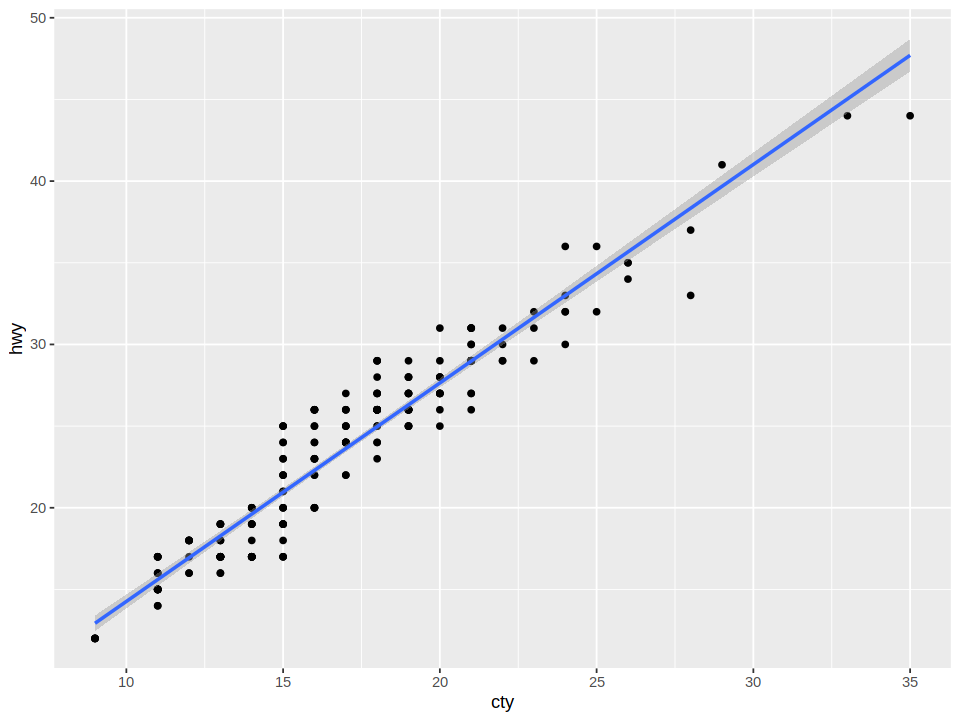

In [23]:
library(ggplot2)
options(repr.plot.width = 8, repr.plot.height = 6)

ggplot(data = mpg, mapping = aes(x = cty, y = hwy) ) +
    geom_point() +                                     # to create a scatterplot
    geom_smooth(formula = y ~ x, method = "lm")        # to fit and overlay a loess trendline

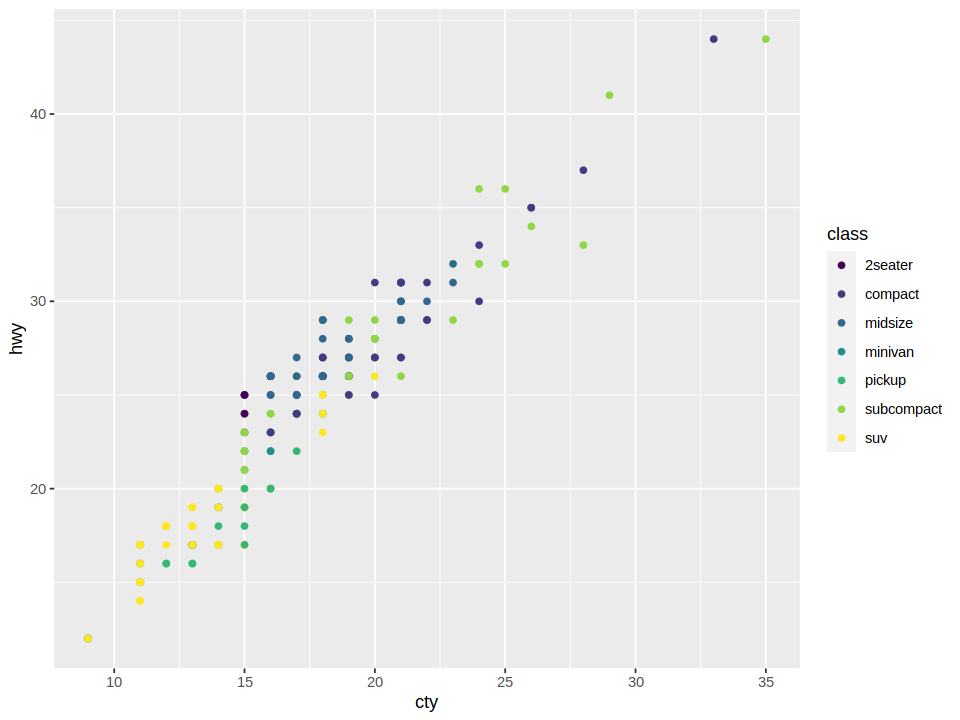

In [19]:
ggplot(mpg, aes(cty, hwy, colour = class)) +
  geom_point() +
  scale_colour_viridis_d()

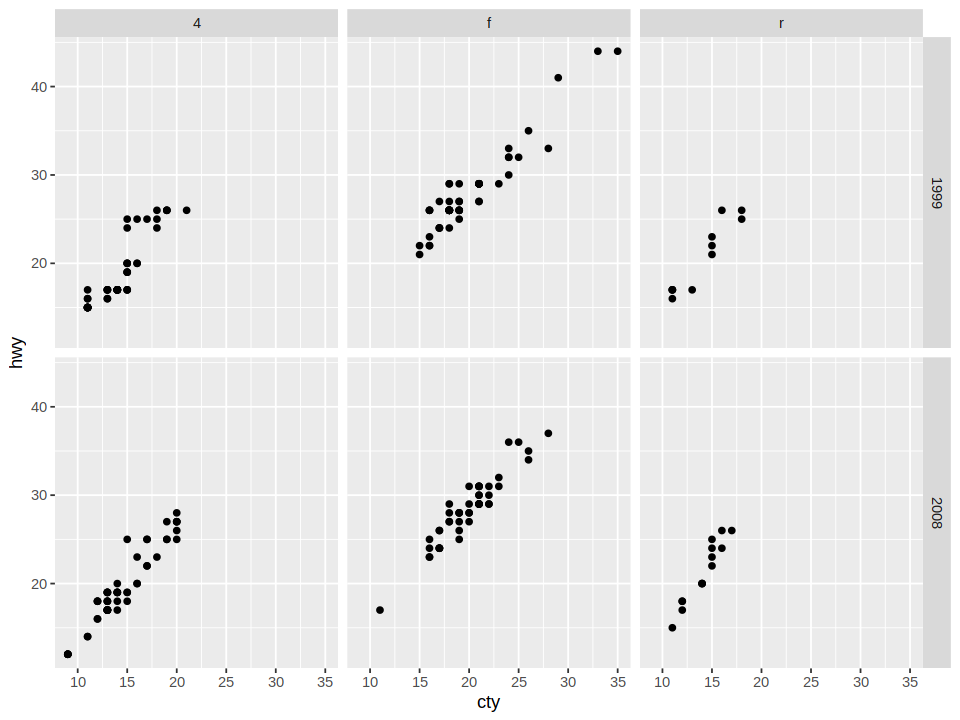

In [20]:
ggplot(mpg, aes(cty, hwy)) +
  geom_point() +
  facet_grid(year ~ drv)

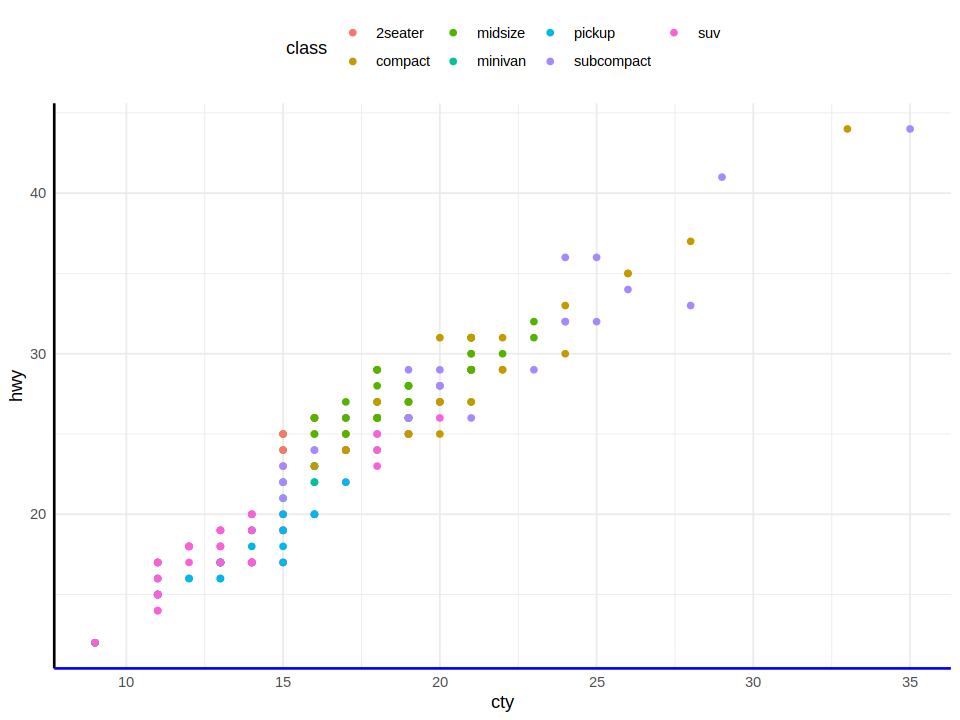

In [21]:
ggplot(mpg, aes(cty, hwy, colour = class)) +
  geom_point() +
  theme_minimal() +
  theme(
    legend.position = "top",
    axis.line = element_line(linewidth = 0.75),
    axis.line.x.bottom = element_line(colour = "blue")
  )

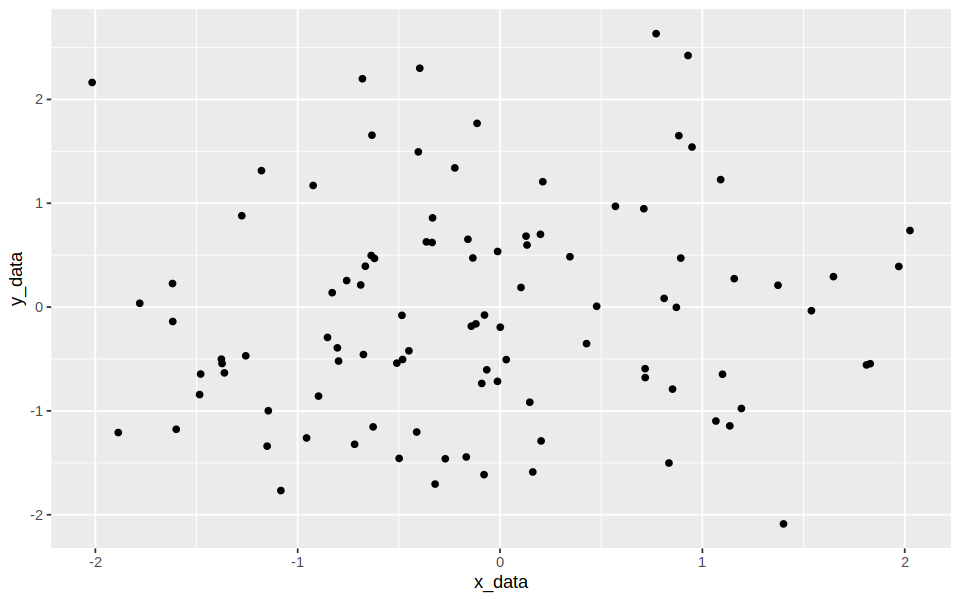

In [100]:
# Create a simple data frame with two variables
data <- data.frame(
  x_data = rnorm(100),   # 100 random numbers for x-axis
  y_data = rnorm(100)    # 100 random numbers for y-axis
)

ggplot(data, aes(x = x_data, y = y_data)) +  # I map the data to the correct  
    geom_point()                              

`geom_smooth()` using formula = 'y ~ x'


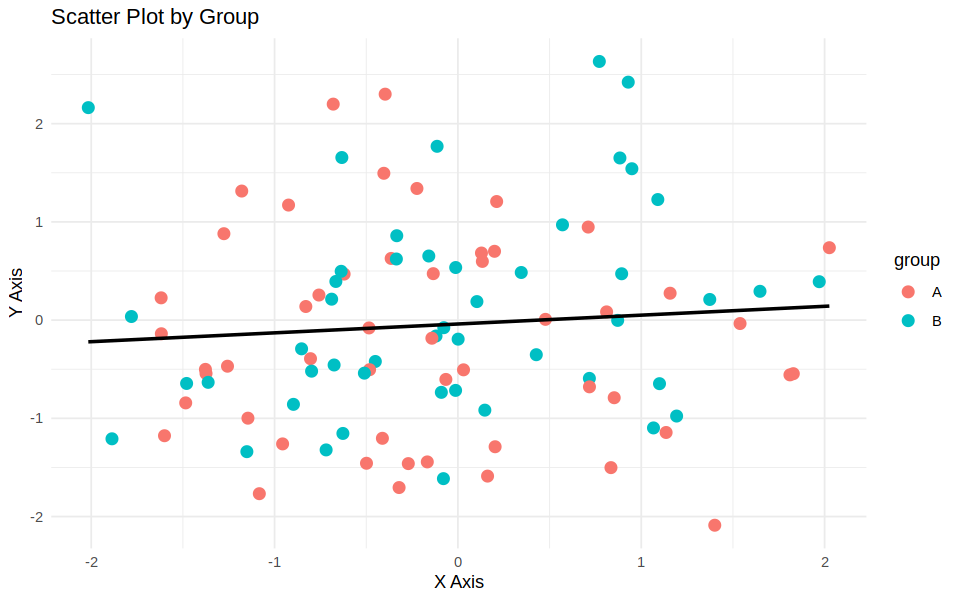

In [105]:
# Add a grouping variable
data$group <- sample(c("A", "B"), 100, replace = TRUE)

# Scatter plot with color based on the group
ggplot(data, aes(x = x_data, y = y_data, color = group)) +     # I map the data to the correct  
    geom_point(size = 3) +                                     # Add points to the plot
    theme_minimal() +                                          # Apply a minimal theme
    geom_smooth(method = "lm", se = FALSE, color = "black") +  # Linear regression line
    labs(title = "Scatter Plot by Group", x = "X Axis", y = "Y Axis")  # Adding titles and axis labels

#### HEATMAP
The `heatmap()` function visualizes a numeric data.frame as a color-coded image. It takes a matrix as input. It displays rows vs columns as a grid. Each cell's color represents the numeric value in the matrix.

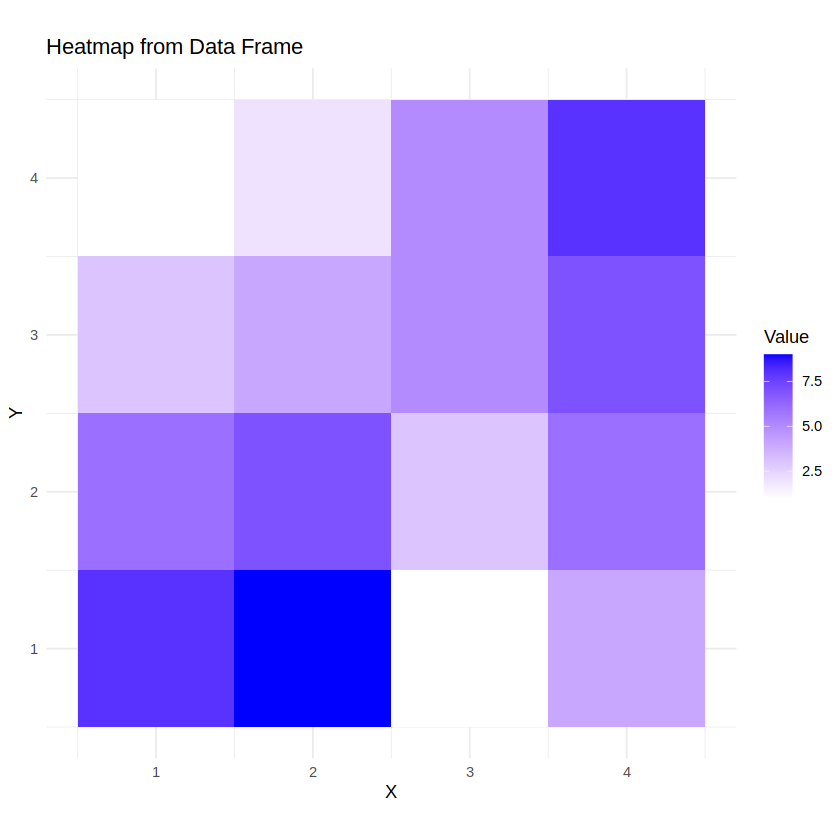

In [5]:
library(ggplot2)

# Create a sample dataframe with 4x4 pixel values
df <- data.frame(
  X = rep(1:4, each = 4),       # X positions (1 to 4, repeated for each row)
  Y = rep(4:1, times = 4),      # Y positions (reversed to match matrix layout)
  Value = c(1, 3, 6, 8,
            2, 4, 7, 9,
            5, 5, 3, 1,
            8, 7, 6, 4)
)

# Plot the heatmap
ggplot(df, aes(x = X, y = Y, fill = Value)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "blue") +
  coord_fixed() +
  labs(title = "Heatmap from Data Frame", x = "X", y = "Y") +
  theme_minimal()
